# Introduction

This package provides functions to perform least-squares fits of quasinormal modes to ringdown waveforms. As long as you have a timeseries (either a single array or a dictionary of spherical-harmonic modes) you can use the functions provided by this package to perform fits.

In addition, some waveform classes are provided for convenience. These provide flux calculations and frame transformations which can be useful when doing ringdown analyses. Currently, there are three types of waveform class which the user can initialise:

 - **SXS**: Loads a waveform from the SXS catalog. This makes use of the `sxs` Python package to automatically download the simulation, so that you only need to specify the ID. 

 - **Surrogate**: Initializes a waveform generated by a surrogate. Currently implemented are **NRSur7dq4** and **NRHybSur3dq8**.

 - **Custom**: The user provides a dictionary of modes. 

The core fitting functions are all available in the `qnmfits.py` file. The waveform classes are in the `Waveforms` folder, and each inherit functions from `Waveforms/Base.BaseClass`.

# Analysing a SXS waveform

To demonstrate the features of the code we will work with the simulation SXS:BBH:0305, but everything will apply to a generic waveform.

## Class initialization

The only required argument for an SXS waveform is a simulation ID. However, it is a good idea to also change the zero-time to something more useful. Here we use the peak of the absolute value of the (2,2) mode (see the `Simulation` docstring for other options, including the ability to transform the modes with a rotation).

In [37]:
import numpy as np
import matplotlib.pyplot as plt
import qnmfits
from mpl_toolkits.axes_grid1.inset_locator import (inset_axes, InsetPosition, mark_inset)
from cmcrameri import cm
from kneed import KneeLocator
from scipy.signal import find_peaks
import os
from scipy.optimize import curve_fit
qnmfits.download_cook_data()



sims = []
ids = [305, 1476, 1477, 1481, 1492, 1495, 1497, 1499, 1500, 1501, 1502, 1503, 1506, 1507, 1509] #1475, causes an error
for id in ids:
    sims.append(qnmfits.SXS(ID=id, zero_time=(2,2)))
    
sim = sims[0]

mismatch_dir = 'figures/mismatch/'

KerrQNM_08.h5 already downloaded.
KerrQNM_09.h5 already downloaded.
Found the following files to load from the SXS catalog:
    SXS:BBH:0305v5/Lev6/metadata.json
Found the following files to load from the SXS catalog:
    SXS:BBH:0305v5/Lev6/rhOverM_Asymptotic_GeometricUnits_CoM.h5
Found the following files to load from the SXS catalog:
    SXS:BBH:1476v5/Lev3/metadata.json
Found the following files to load from the SXS catalog:
    SXS:BBH:1476v5/Lev3/rhOverM_Asymptotic_GeometricUnits_CoM.h5
Found the following files to load from the SXS catalog:
    SXS:BBH:1477v5/Lev3/metadata.json
Found the following files to load from the SXS catalog:
    SXS:BBH:1477v5/Lev3/rhOverM_Asymptotic_GeometricUnits_CoM.h5
Found the following files to load from the SXS catalog:
    SXS:BBH:1481v5/Lev3/metadata.json
Found the following files to load from the SXS catalog:
    SXS:BBH:1481v5/Lev3/rhOverM_Asymptotic_GeometricUnits_CoM.h5
Found the following files to load from the SXS catalog:
    SXS:BBH:1492

In [38]:
#sim.print_metadata()

In [39]:
sim.times

array([-1804.13791279, -1803.5032643 , -1802.86745264, ...,
         151.47421942,   151.57421365,   151.67420788])

In [40]:
# Time:
sim.times

# 22 mode
sim.h[2,2] # = hplus + i hcross

# Can you make a plot of 

array([ 1.15232258e-01-7.78880531e-04j,  1.15176171e-01-3.98142937e-03j,
        1.15030718e-01-7.18773693e-03j, ...,
       -6.71559606e-06-2.00978043e-05j, -6.84145863e-06-2.01459511e-05j,
       -6.96868187e-06-2.01867676e-05j])

## Perform a single QNM fit

In the `qnmfits` package there are functions for fitting to a single timeseries or to perform multimode fits to a dictionary of modes. We start with the simple single timeseries fit:

In [41]:
qnmfits.ringdown_fit?

Signature:
qnmfits.ringdown_fit(
    times,
    data,
    modes,
    Mf,
    chif,
    t0,
    t0_method='geq',
    T=100,
)
Docstring:
Perform a least-squares fit to some data using a ringdown model.

Parameters
----------
times : array_like
    The times associated with the data to be fitted.
    
data : array_like
    The data to be fitted by the ringdown model.
    
modes : array_like
    A sequence of (l,m,n,sign) tuples to specify which QNMs to include in 
    the ringdown model. For regular (positive real part) modes use 
    sign=+1. For mirror (negative real part) modes use sign=-1. For 
    nonlinear modes, the tuple has the form 
    (l1,m1,n1,sign1,l2,m2,n2,sign2,...).
    
Mf : float
    The remnant black hole mass, which along with chif determines the QNM
    frequencies.
    
chif : float
    The magnitude of the remnant black hole spin.
    
t0 : float
    The start time of the ringdown model.
    
t0_method : str, optional
    A requested ringdown start time will in ge

In particular, note that the QNMs to fit are provided using tuples of length four: $(\ell, m, n, \pm)$. The fourth entry is either $+1$ or $-1$, and indicates the sign of the real part of the QNM frequency. In other words, $(\ell, m, n, +1)$ refers to the "regular" modes, and $(\ell, m, n, -1)$ referes to the "mirror" modes. This is different to the "prograde" and "retrograde" classification, mostly because I wanted to avoid any ambiguity regarding the $m=0$ modes.

Saved mismatchpeaksscipy305.png
Saved mismatchpeaksscipy1476.png
Saved mismatchpeaksscipy1477.png
Saved mismatchpeaksscipy1481.png
Saved mismatchpeaksscipy1492.png
Saved mismatchpeaksscipy1495.png
Saved mismatchpeaksscipy1497.png
Saved mismatchpeaksscipy1499.png
Saved mismatchpeaksscipy1500.png
Saved mismatchpeaksscipy1501.png
Saved mismatchpeaksscipy1502.png
Saved mismatchpeaksscipy1503.png
Saved mismatchpeaksscipy1506.png
Saved mismatchpeaksscipy1507.png
Saved mismatchpeaksscipy1509.png


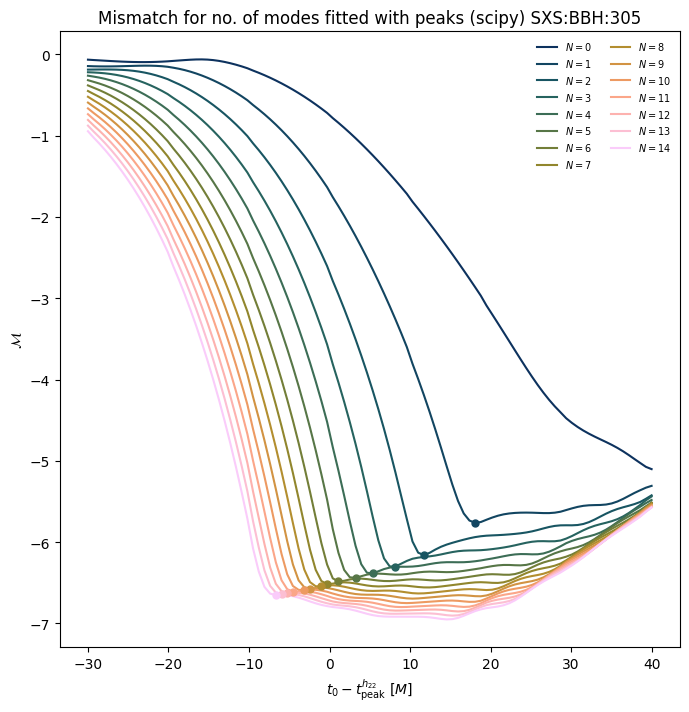

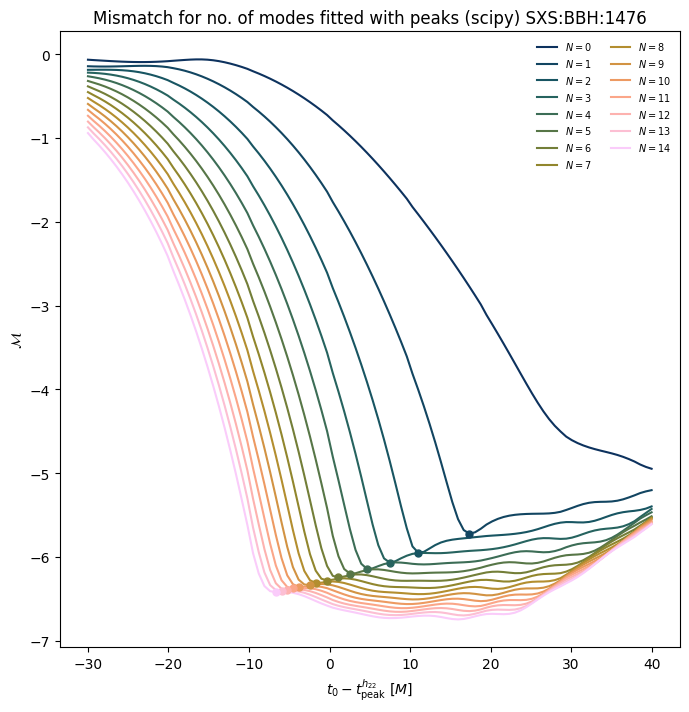

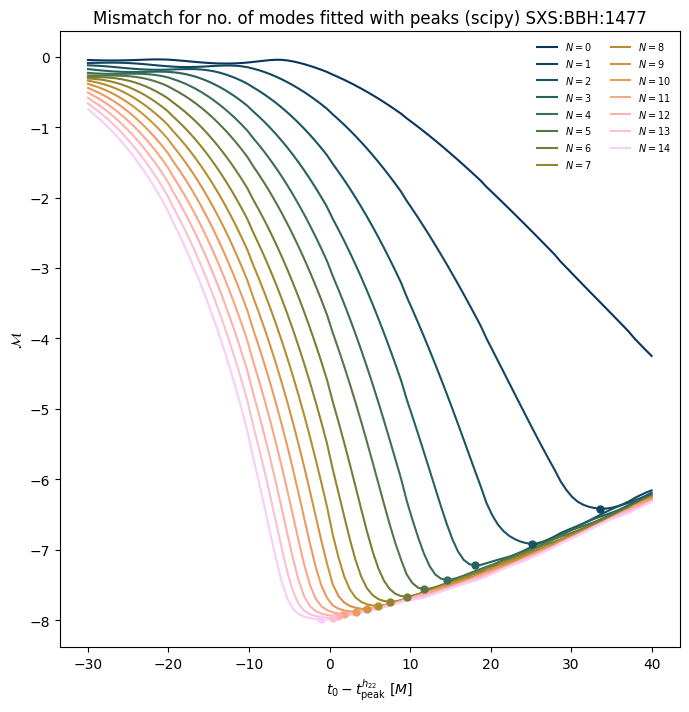

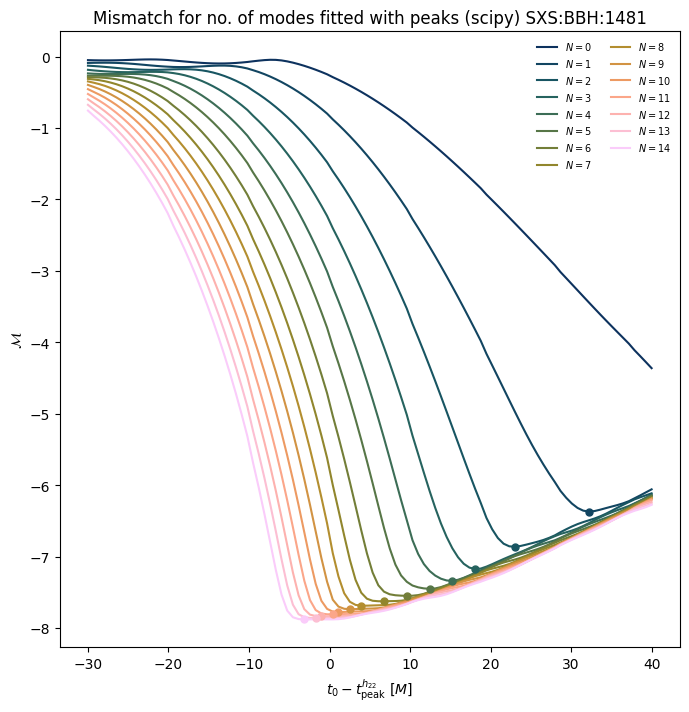

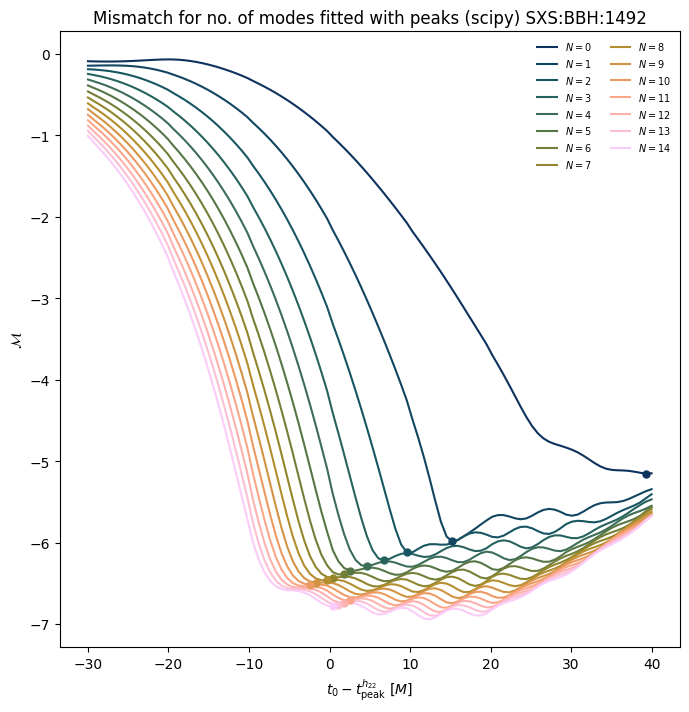

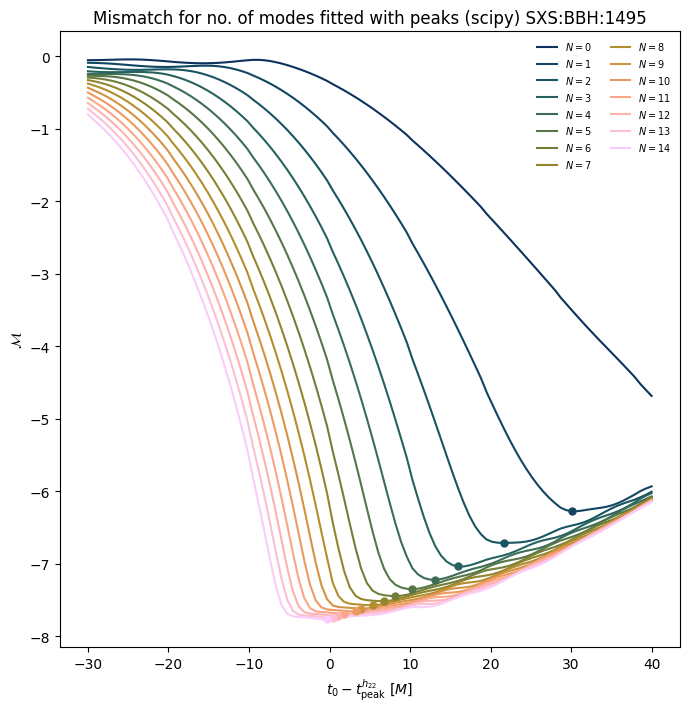

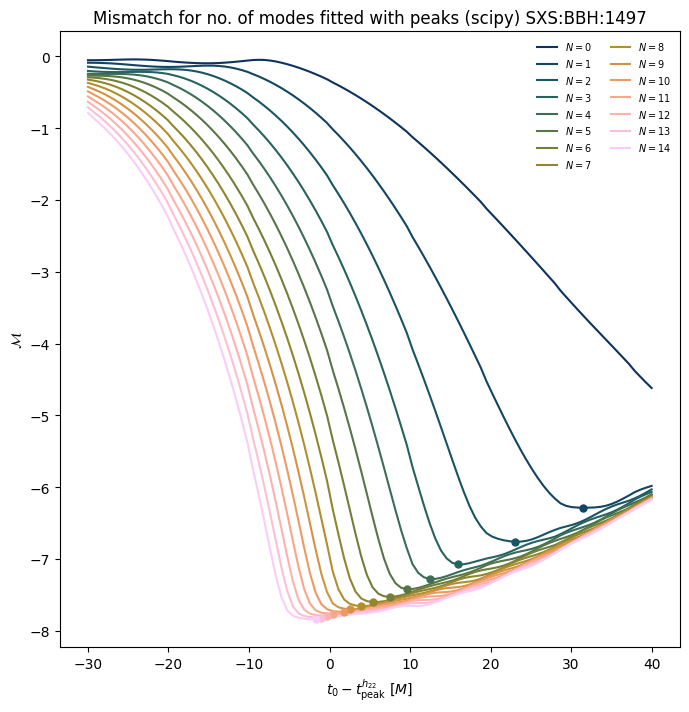

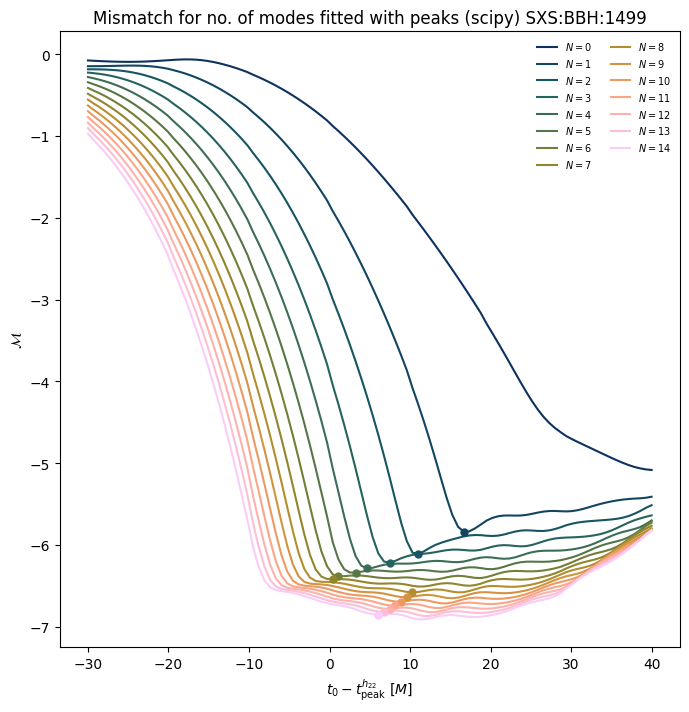

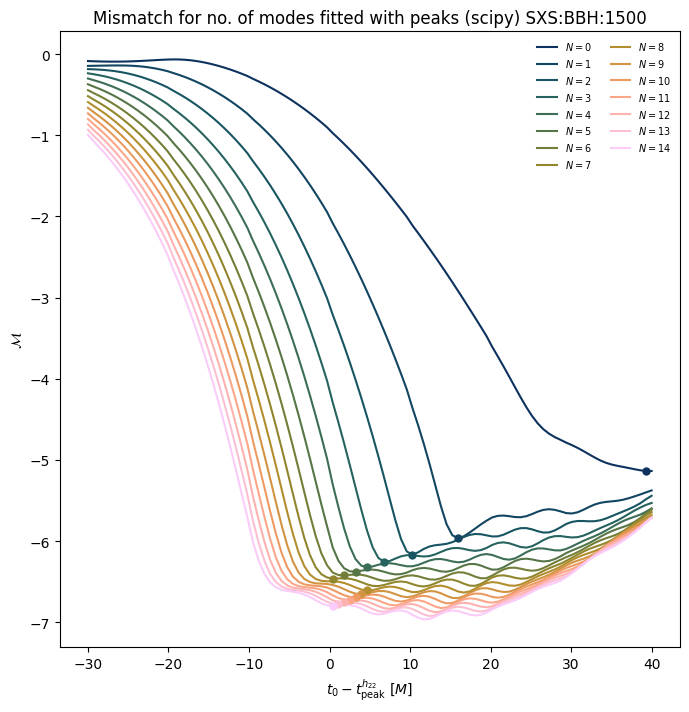

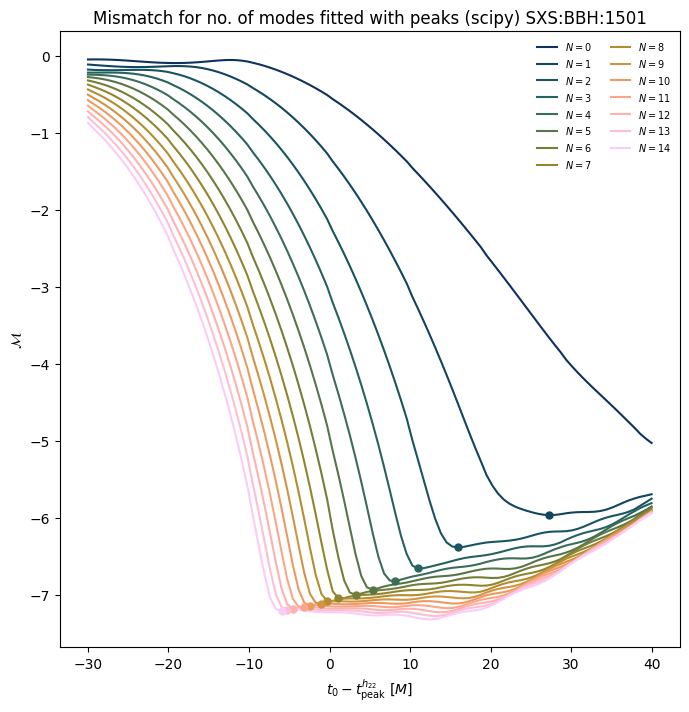

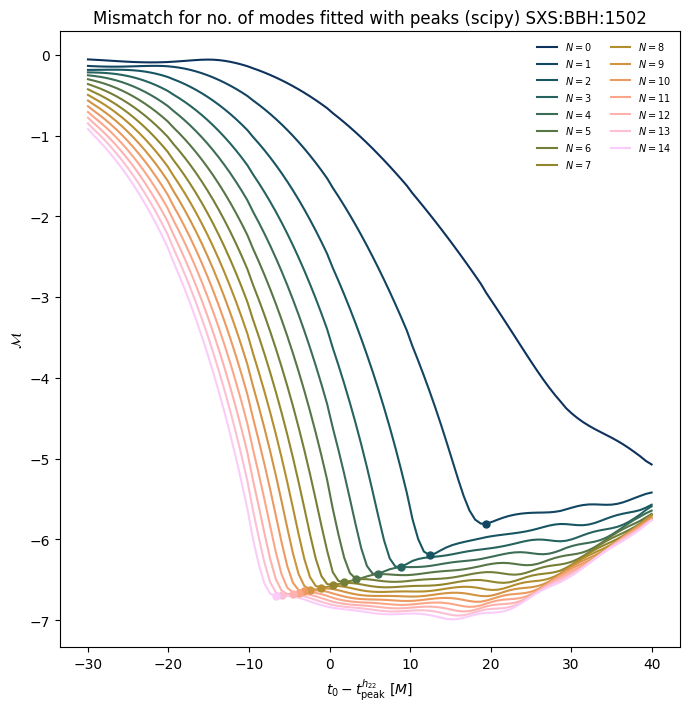

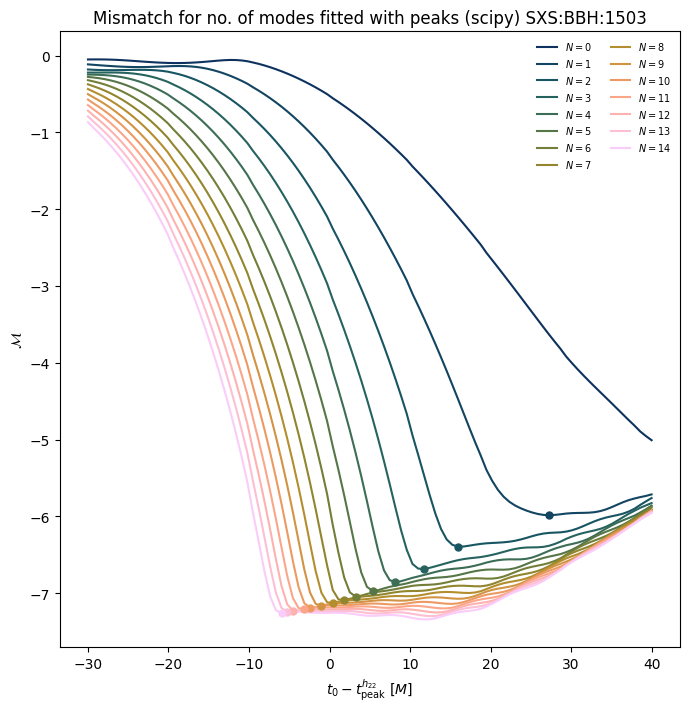

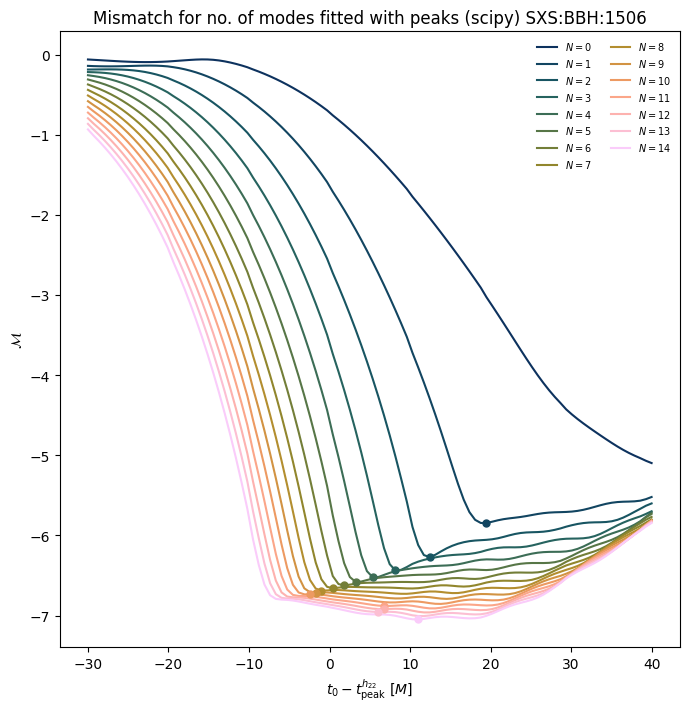

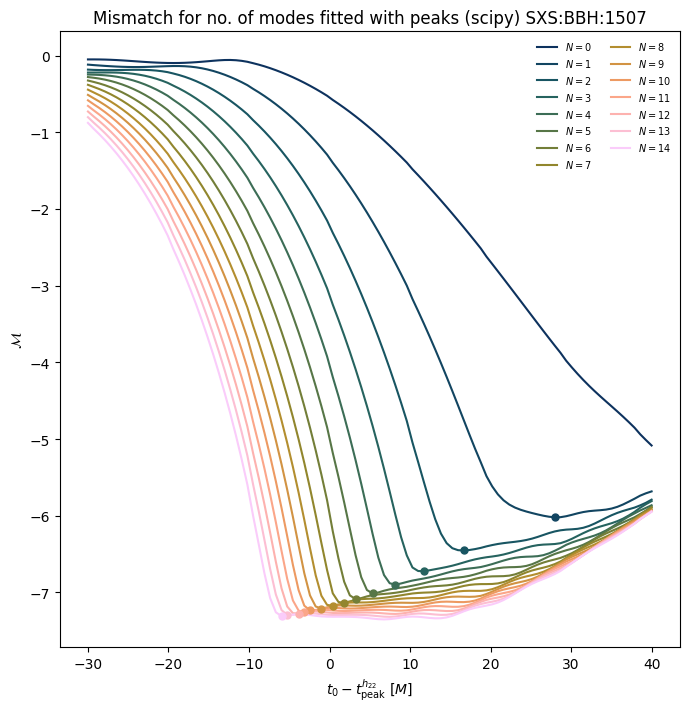

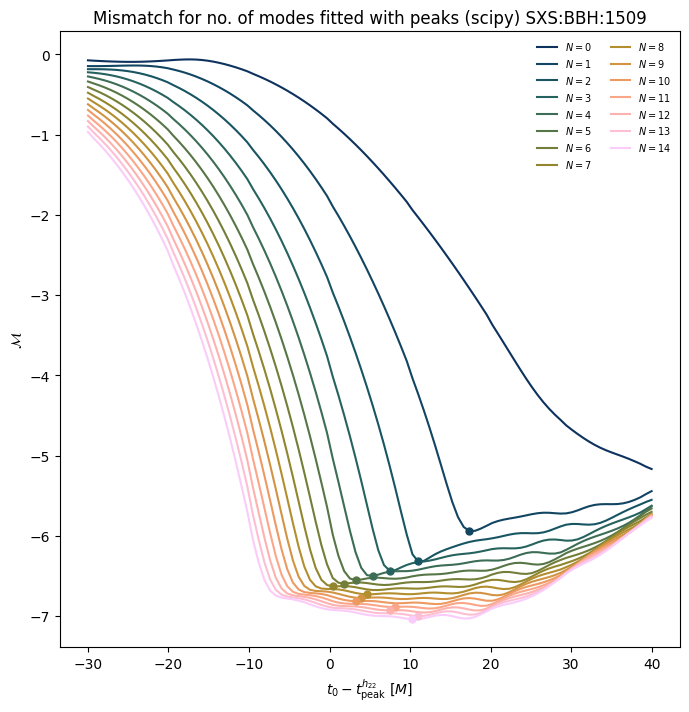

In [42]:
for (sim,ind) in zip(sims,ids):
    fig, ax = plt.subplots(figsize=(8,8))


    # The start times to use
    t0s = np.linspace(-30, 40, 100)


    N = 16
    colors = cm.batlow(np.linspace(0,1,N))

    pMs = []
    ptims = []

    for k in range(1,N):
        Ms = []
        modes = [(2,2,n,1) for n in range(k)]
        for i in range(len(t0s)):
            fit = qnmfits.ringdown_fit(
                sim.times,
                sim.h[2,2],
                modes,
                Mf=sim.Mf,
                chif=sim.chif_mag,
                t0=t0s[i]
            )
            Ms.append(fit['mismatch'])

        logMs = np.log(Ms)/np.log(10)
        
        ax.plot(t0s, logMs, alpha = 1, label=f'$N = {modes[-1][-2]}$', color = colors[k],zorder=i)
        
        peak, _ = find_peaks(-logMs, height=3, prominence=1e-10)
        #print(peak)

        p = [t0s[peak],logMs[peak]]
        if len(peak) >= 1:
            ax.plot(t0s[peak[0]], logMs[peak[0]], "o", markersize = 5, color = colors[k], zorder=100)
            ptims.append(t0s[peak[0]])
            pMs.append(logMs[peak[0]])
        #print("Peak is at " + str(p))


    #ax.grid(which='both')
    ax.set_title(r'Mismatch for no. of modes fitted with peaks (scipy) SXS:BBH:' + str(ind))
    ax.set_xlabel('$t_0 - t^{h_{22}}_\mathrm{peak}\ [M]$')
    ax.set_ylabel('$\mathcal{M}$')
    ax.legend(loc='lower right')
    #ax.set_yscale('log')

    #ax.set_xlim(-3,0)
    #ax.set_ylim(-7,-6)


    _ = ax.legend(ncol=2, frameon=False, fontsize=7)
    #plt.savefig('mismatchpeaks.png', dpi=500, bbox_inches='tight')
    # Save figure
    if not os.path.exists(mismatch_dir):
        os.makedirs(mismatch_dir)
    plt.savefig(mismatch_dir + 'mismatchpeaksscipy' + str(ind) + '.png', dpi=500, bbox_inches='tight')
    print('Saved mismatchpeaksscipy' + str(ind) + '.png')

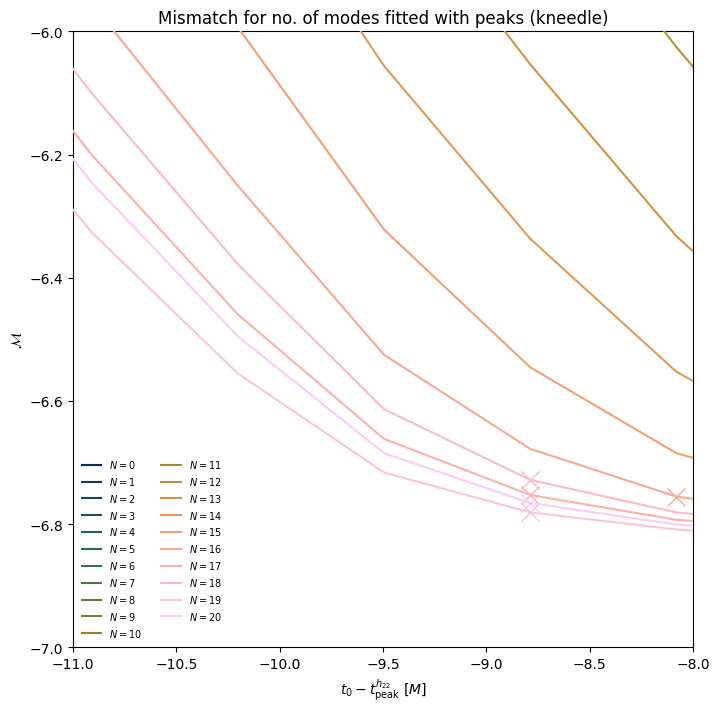

In [43]:
fig, ax = plt.subplots(figsize=(8,8))


# The start times to use
t0s = np.linspace(-30, 40, 100)


N = 22
colors = cm.batlow(np.linspace(0,1,N))

pMs = []
ptims = []

for k in range(1,N):
    Ms = []
    modes = [(2,2,n,1) for n in range(k)]
    for i in range(len(t0s)):
        fit = qnmfits.ringdown_fit(
            sim.times,
            sim.h[2,2],
            modes,
            Mf=sim.Mf,
            chif=sim.chif_mag,
            t0=t0s[i]
        )
        Ms.append(fit['mismatch'])

    logMs = np.log(Ms)/np.log(10)
    
    ax.plot(t0s, logMs, alpha = 1, label=f'$N = {modes[-1][-2]}$', color = colors[k],zorder=i)
    
    kneedle = KneeLocator(t0s, -logMs, S=0.01, curve="concave", direction="increasing", online = "true")
    ax.plot(kneedle.knee, logMs[np.ndarray.tolist(t0s).index(kneedle.knee)], "x", markersize = 12.5, color = colors[k])
    #print((kneedle.knee))
    #print((kneedle.elbow))
    pMs.append(logMs[np.ndarray.tolist(t0s).index(kneedle.knee)])
    ptims.append(kneedle.knee)


#ax.grid(which='both')
ax.set_title(r'Mismatch for no. of modes fitted with peaks (kneedle)')
ax.set_xlabel('$t_0 - t^{h_{22}}_\mathrm{peak}\ [M]$')
ax.set_ylabel('$\mathcal{M}$')
ax.legend(loc='lower right')
#ax.set_yscale('log')

ax.set_xlim(-11,-8)
ax.set_ylim(-7,-6)


_ = ax.legend(ncol=2, frameon=False, fontsize=7)
#plt.savefig('mismatchpeaks.png', dpi=500, bbox_inches='tight')

[-8.787878787878789,
 -8.787878787878789,
 -8.787878787878789,
 -8.787878787878789]

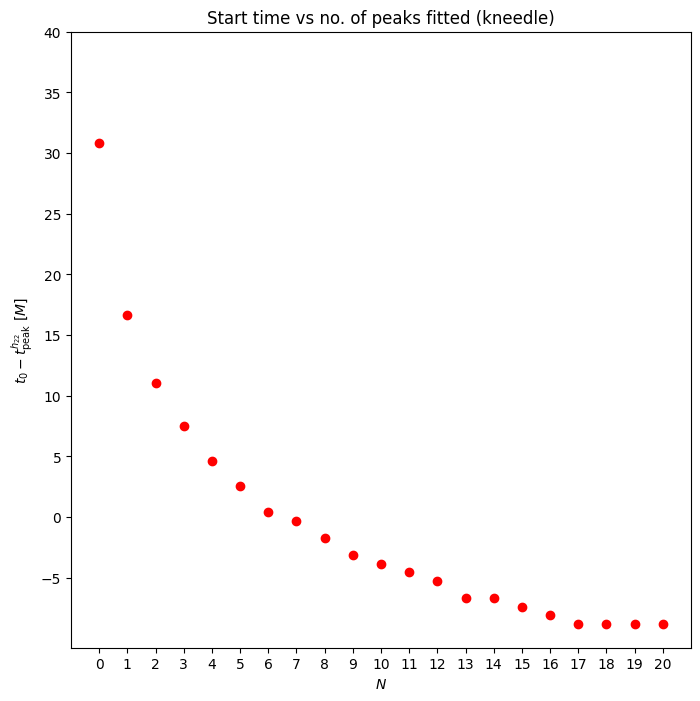

In [44]:
fig, ax = plt.subplots(figsize=(8,8))

Nmodes = np.arange(N-1)

ax.scatter(Nmodes,ptims,color="red")

#ax.grid(which='both')
ax.set_title(r'Start time vs no. of peaks fitted (kneedle)')
ax.set_xlabel('$N$')
ax.set_ylabel('$t_0 - t^{h_{22}}_\mathrm{peak}\ [M]$')
#ax.set_yscale('log')

ax.set_yticks(np.linspace(-5,40,10));
ax.set_xticks(Nmodes);

#plt.savefig('starttimevspeaks.png', dpi=500, bbox_inches='tight')

ptims[-4:]

[0.70707071 0.70707071 0.70707071 0.70707071 0.70707071 0.70707071
 0.70707071 0.70707071 0.70707071 0.70707071 0.70707071 0.70707071
 0.70707071 0.70707071 0.70707071 0.70707071 0.70707071 0.70707071
 0.70707071 0.70707071 0.70707071 0.70707071 0.70707071 0.70707071
 0.70707071 0.70707071 0.70707071 0.70707071 0.70707071 0.70707071
 0.70707071 0.70707071 0.70707071 0.70707071 0.70707071 0.70707071
 0.70707071 0.70707071 0.70707071 0.70707071 0.70707071 0.70707071
 0.70707071 0.70707071 0.70707071 0.70707071 0.70707071 0.70707071
 0.70707071 0.70707071 0.70707071 0.70707071 0.70707071 0.70707071
 0.70707071 0.70707071 0.70707071 0.70707071 0.70707071 0.70707071
 0.70707071 0.70707071 0.70707071 0.70707071 0.70707071 0.70707071
 0.70707071 0.70707071 0.70707071 0.70707071 0.70707071 0.70707071
 0.70707071 0.70707071 0.70707071 0.70707071 0.70707071 0.70707071
 0.70707071 0.70707071 0.70707071 0.70707071 0.70707071 0.70707071
 0.70707071 0.70707071 0.70707071 0.70707071 0.70707071 0.7070

C:\Users\willi\AppData\Local\Temp\ipykernel_25548\3825980839.py:87: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`). Consider using `matplotlib.pyplot.close()`.
  fig, ax = plt.subplots(figsize=(8,8))


Saved mismatchpeakskneedlelast1497.png
[0.70707071 0.70707071 0.70707071 0.70707071 0.70707071 0.70707071
 0.70707071 0.70707071 0.70707071 0.70707071 0.70707071 0.70707071
 0.70707071 0.70707071 0.70707071 0.70707071 0.70707071 0.70707071
 0.70707071 0.70707071 0.70707071 0.70707071 0.70707071 0.70707071
 0.70707071 0.70707071 0.70707071 0.70707071 0.70707071 0.70707071
 0.70707071 0.70707071 0.70707071 0.70707071 0.70707071 0.70707071
 0.70707071 0.70707071 0.70707071 0.70707071 0.70707071 0.70707071
 0.70707071 0.70707071 0.70707071 0.70707071 0.70707071 0.70707071
 0.70707071 0.70707071 0.70707071 0.70707071 0.70707071 0.70707071
 0.70707071 0.70707071 0.70707071 0.70707071 0.70707071 0.70707071
 0.70707071 0.70707071 0.70707071 0.70707071 0.70707071 0.70707071
 0.70707071 0.70707071 0.70707071 0.70707071 0.70707071 0.70707071
 0.70707071 0.70707071 0.70707071 0.70707071 0.70707071 0.70707071
 0.70707071 0.70707071 0.70707071 0.70707071 0.70707071 0.70707071
 0.70707071 0.70707071 

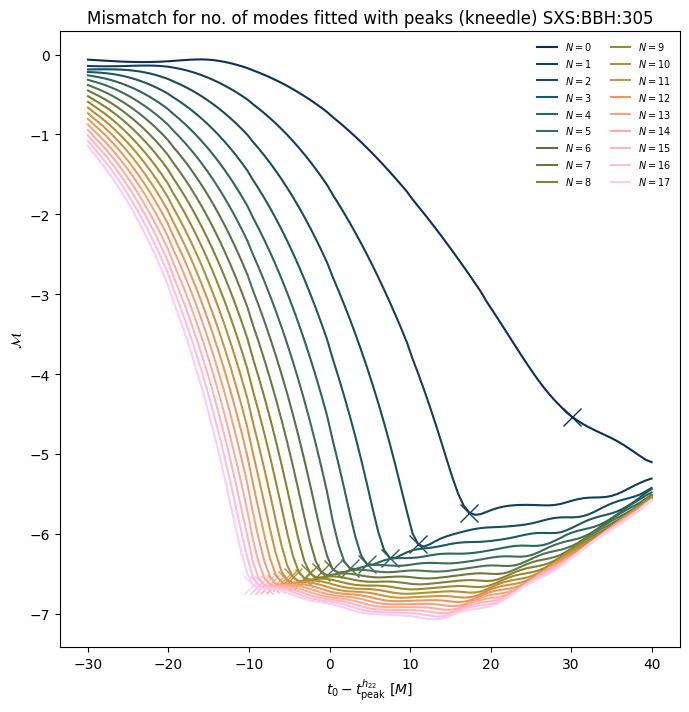

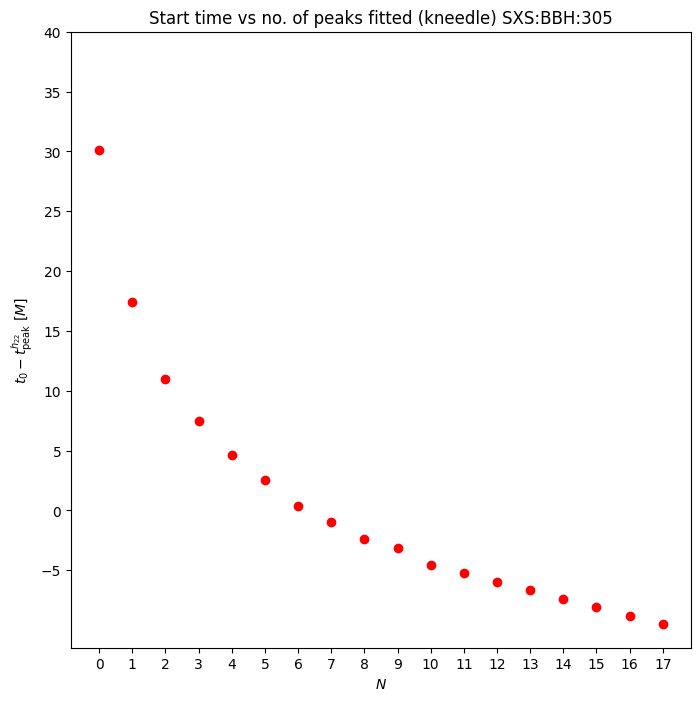

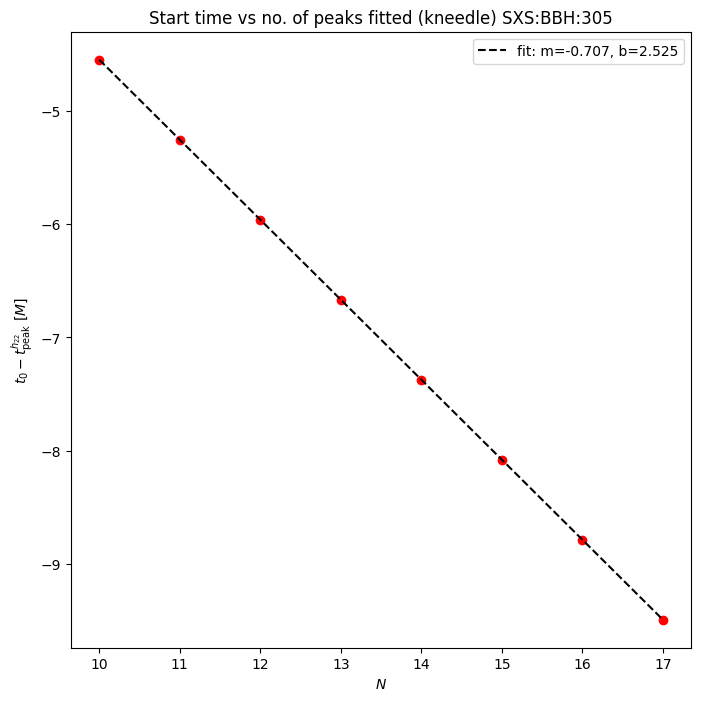

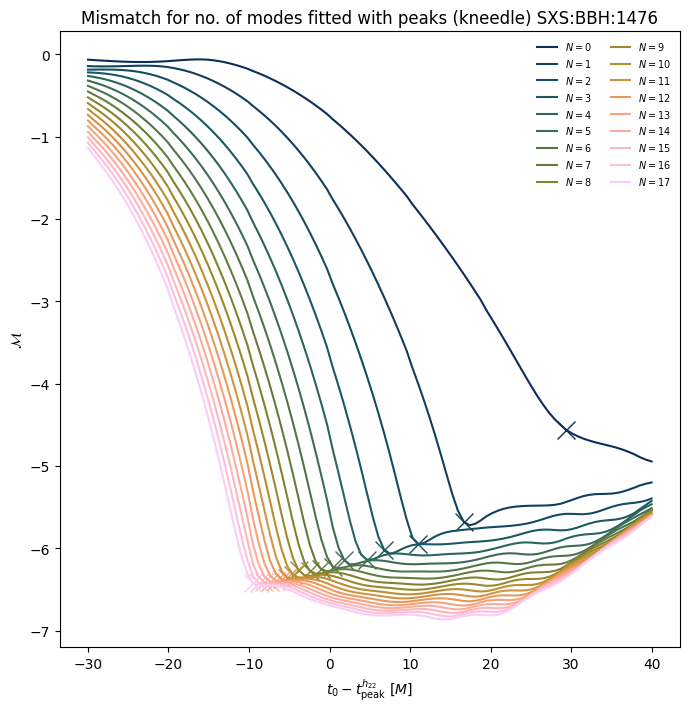

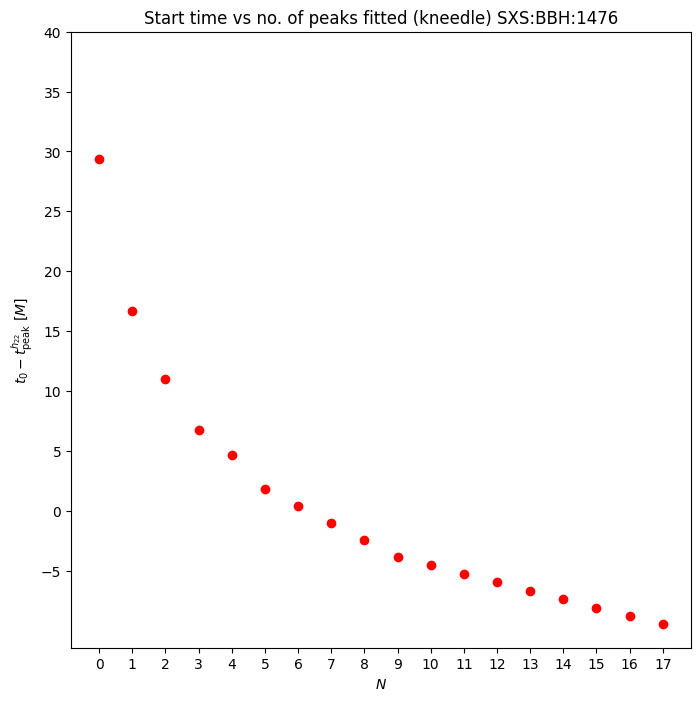

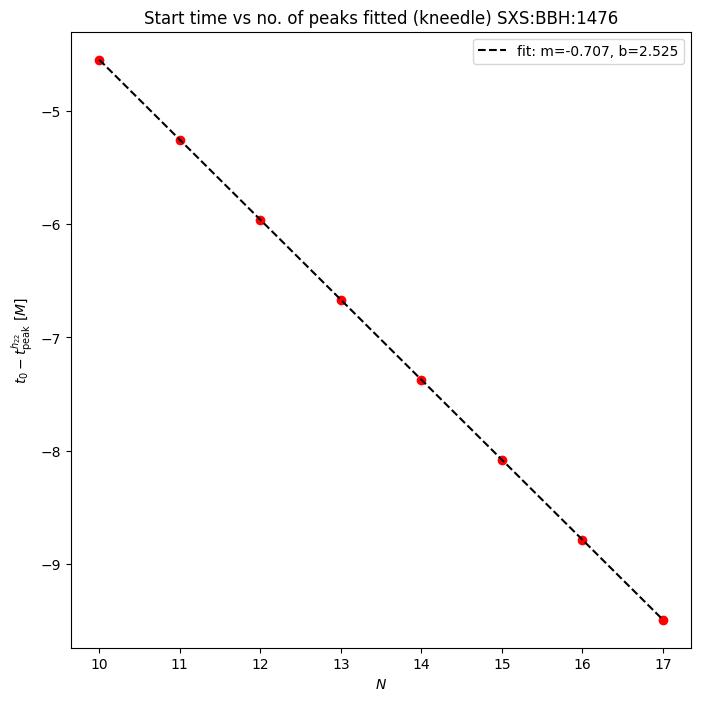

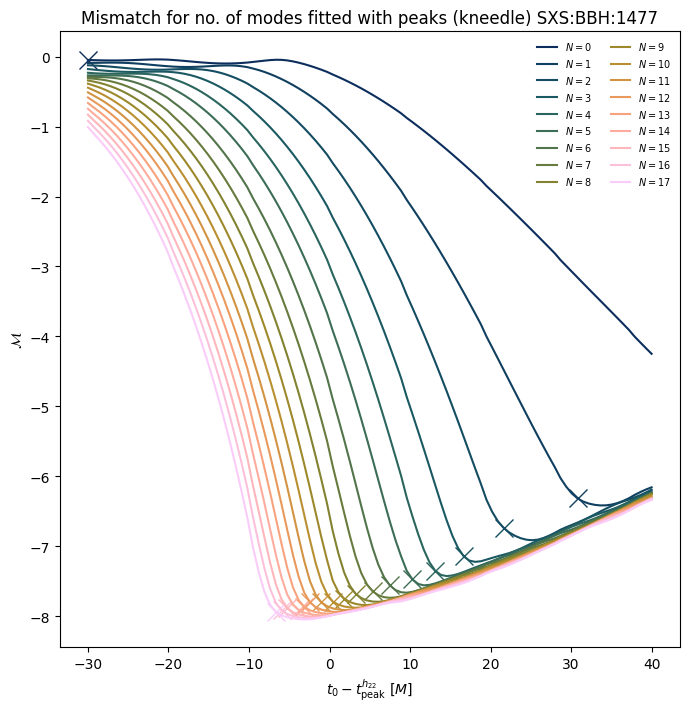

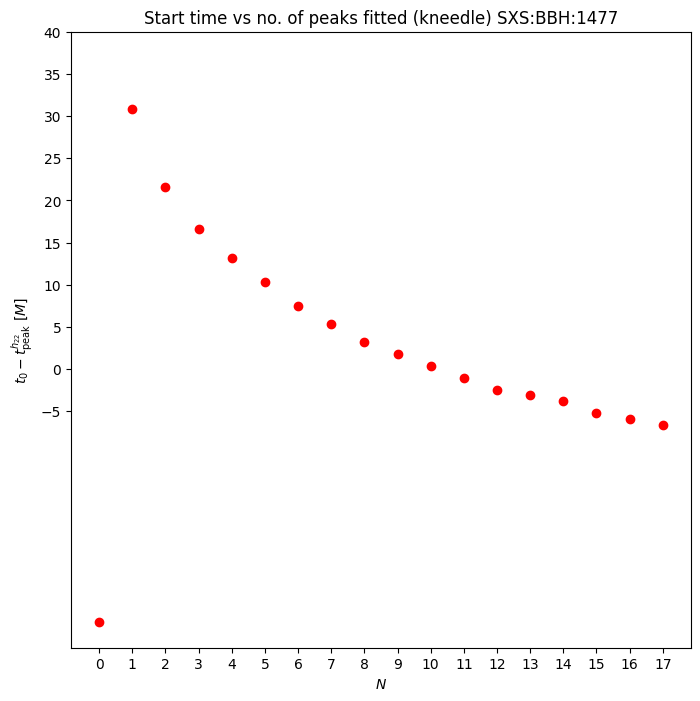

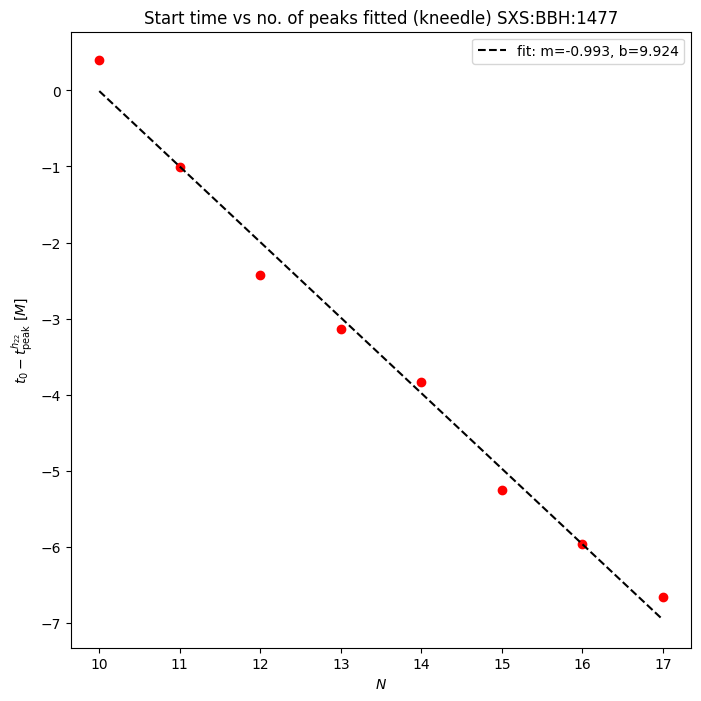

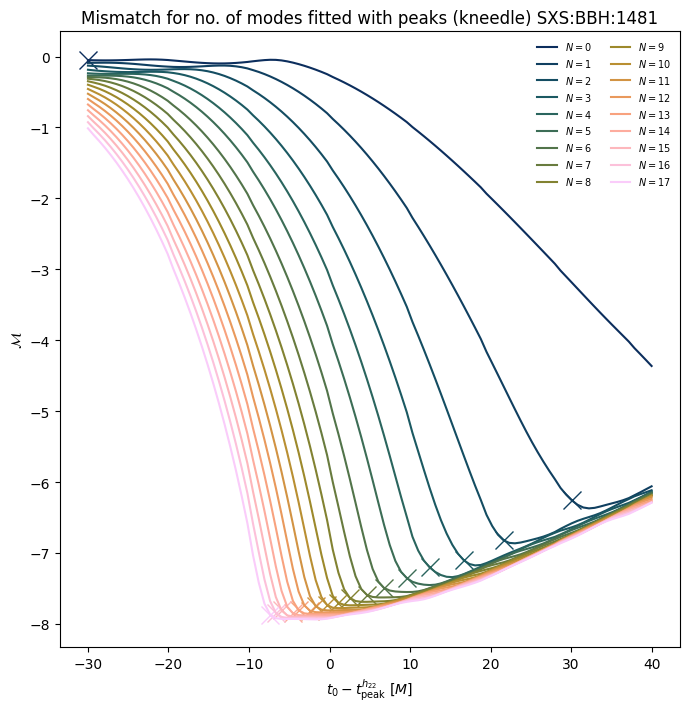

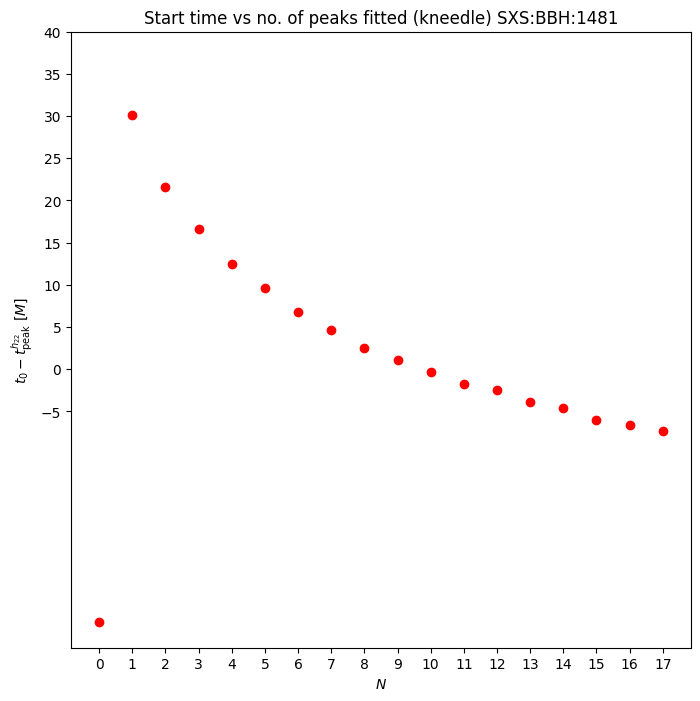

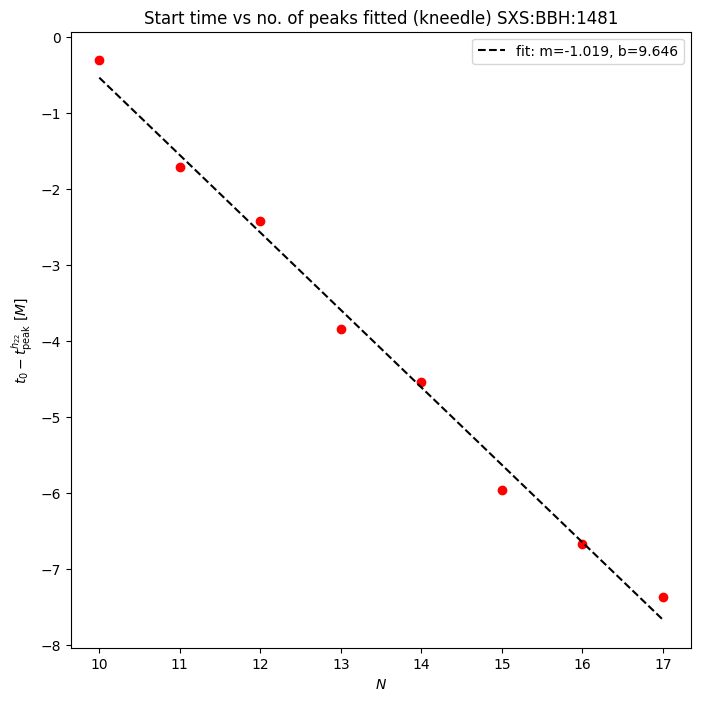

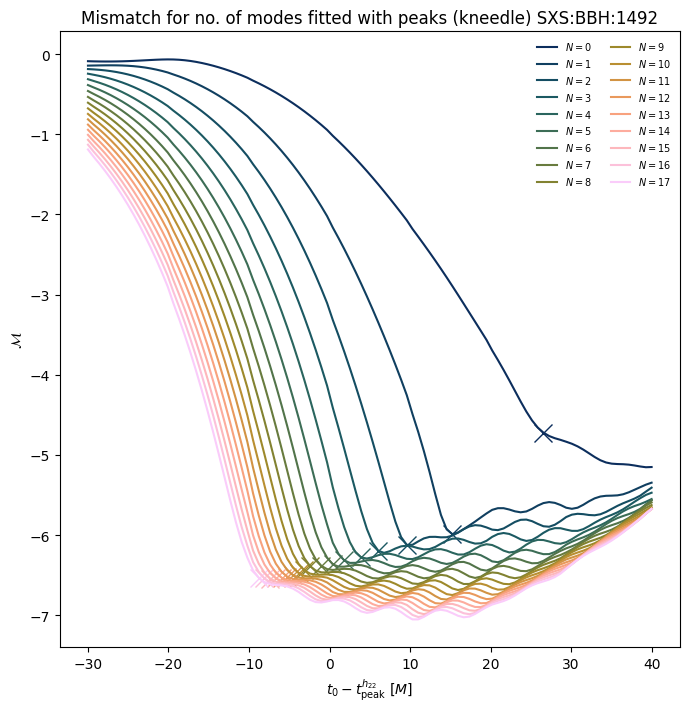

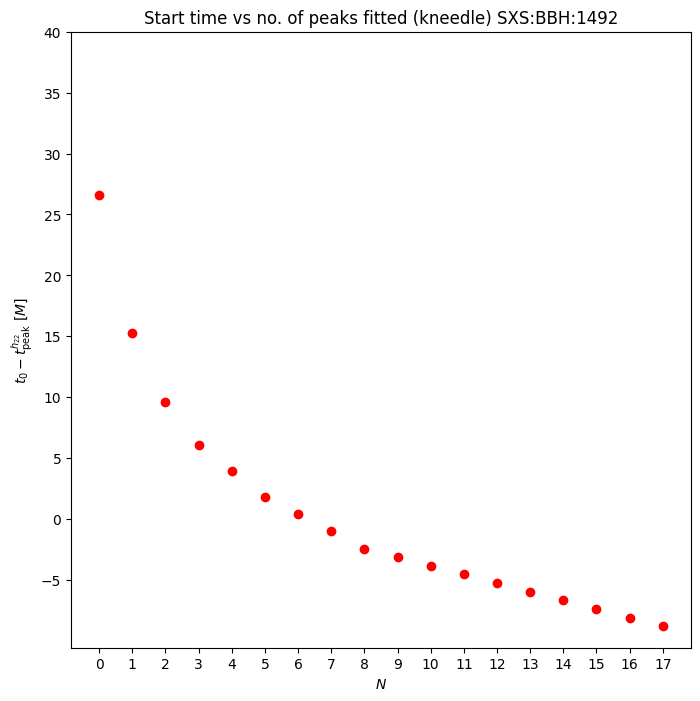

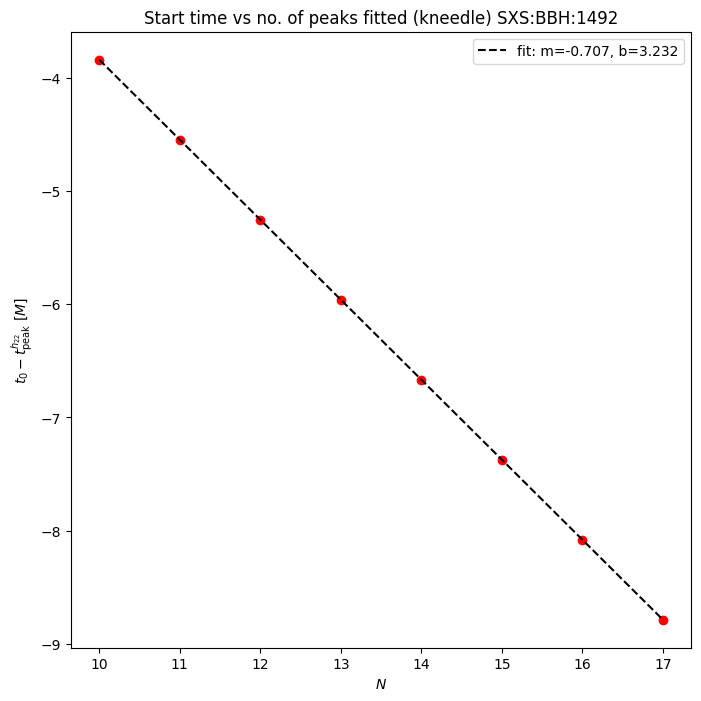

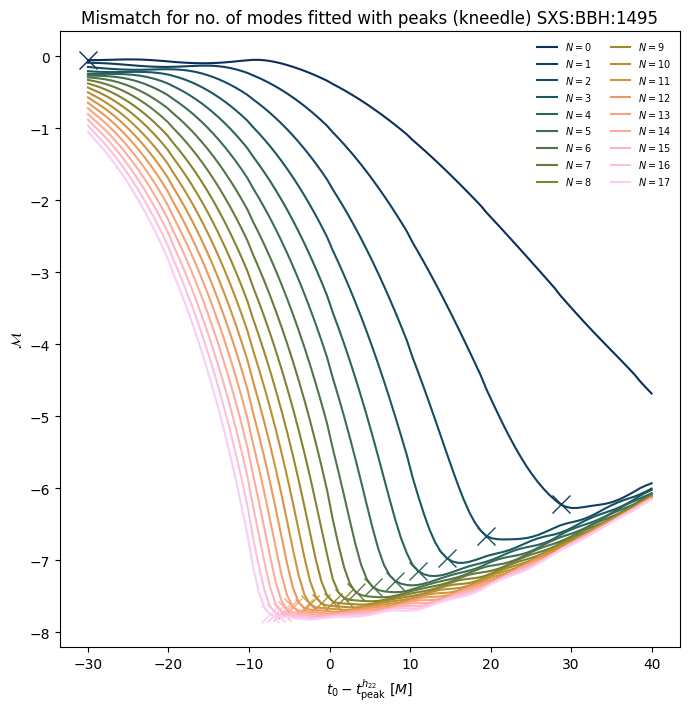

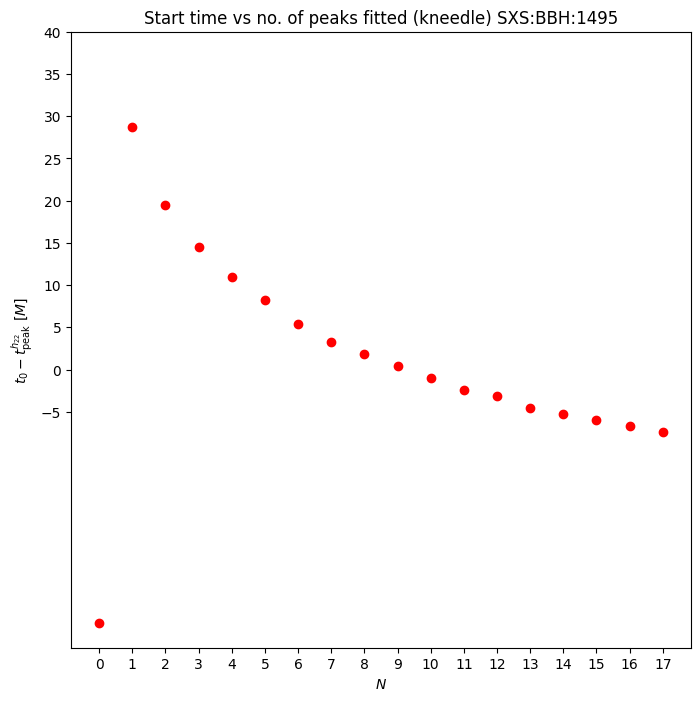

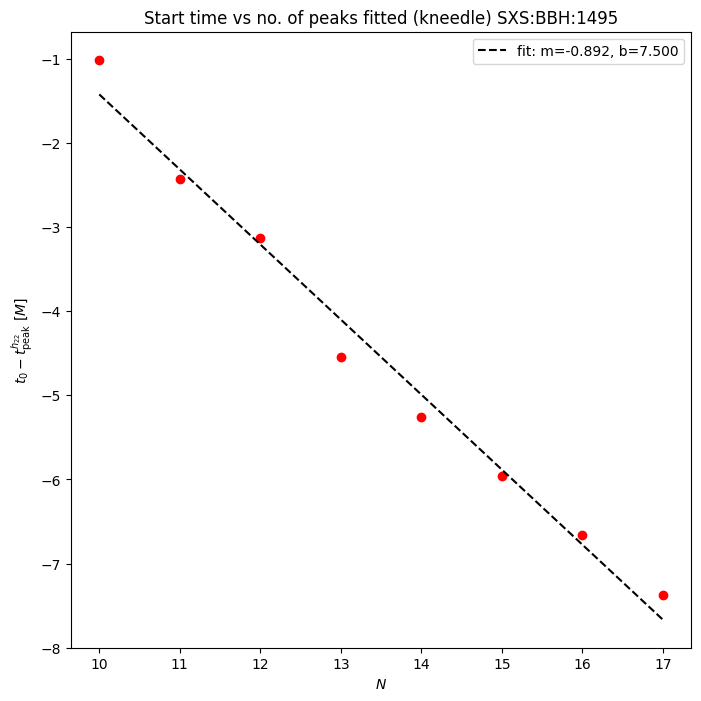

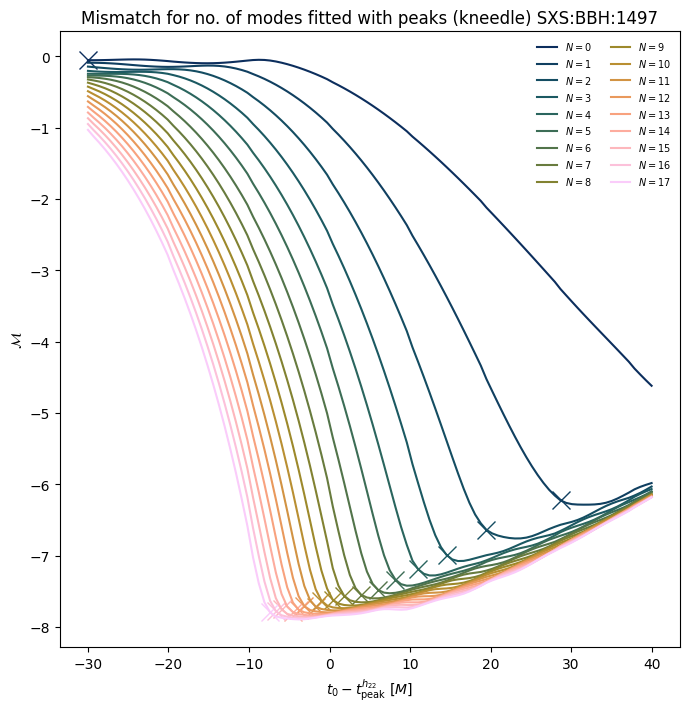

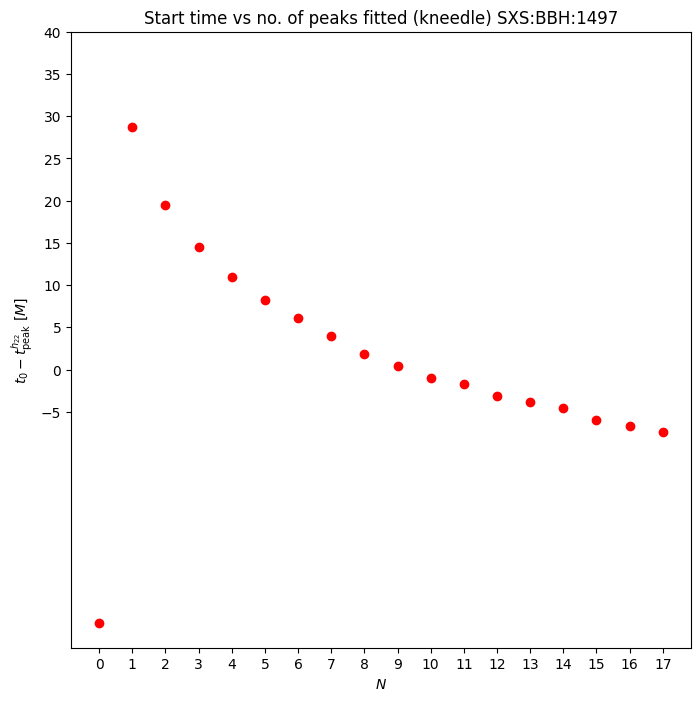

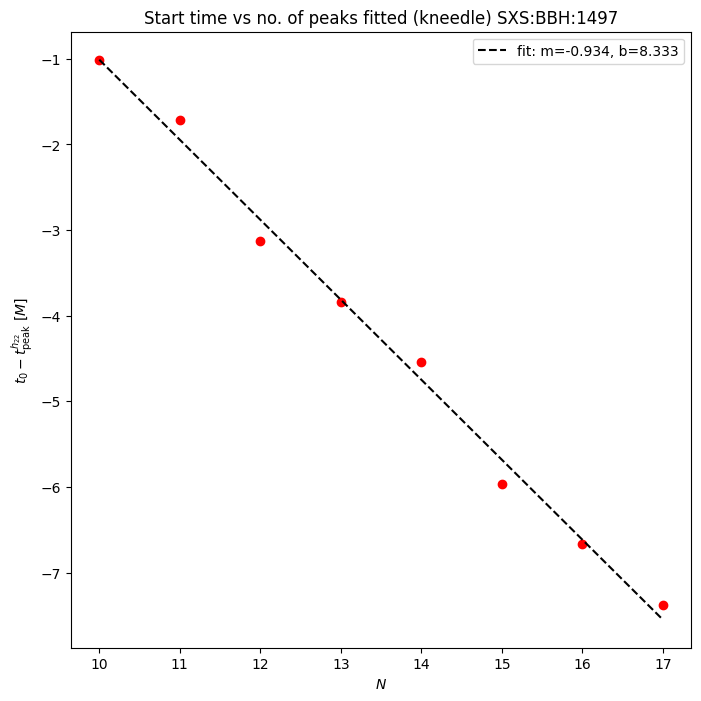

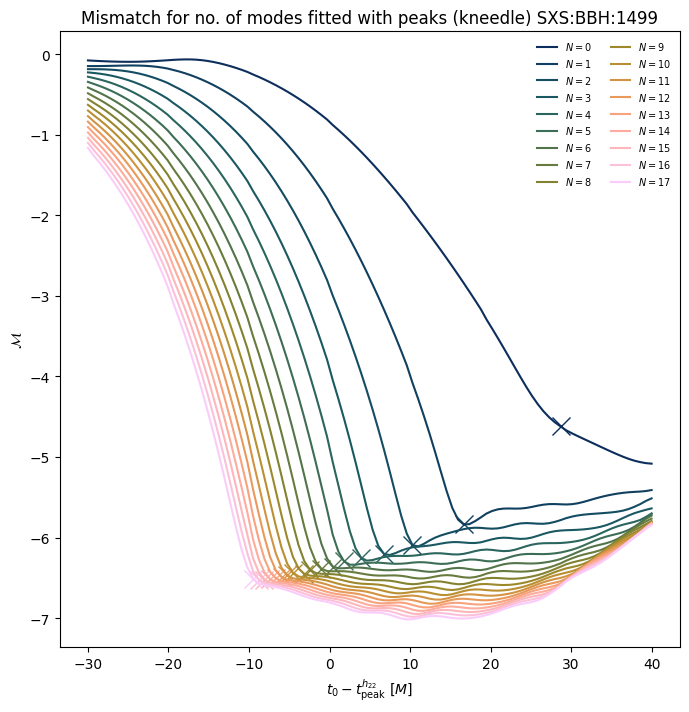

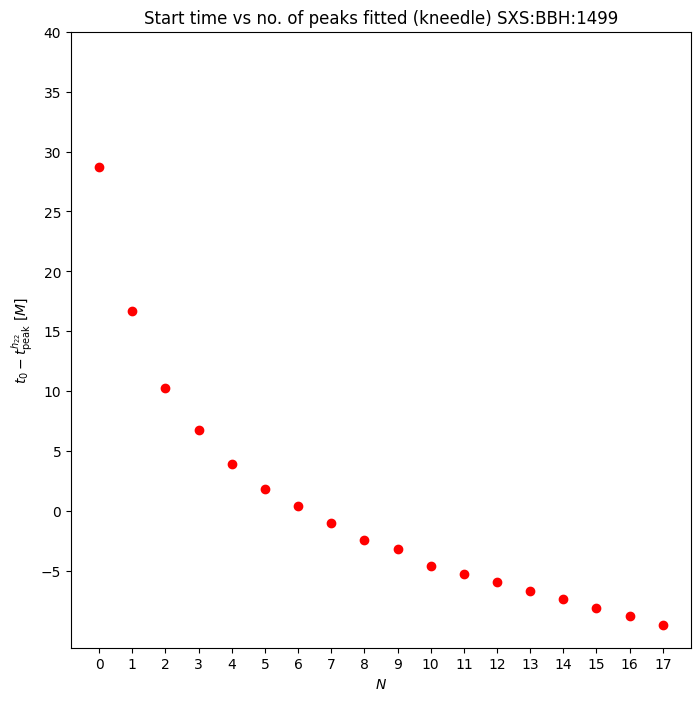

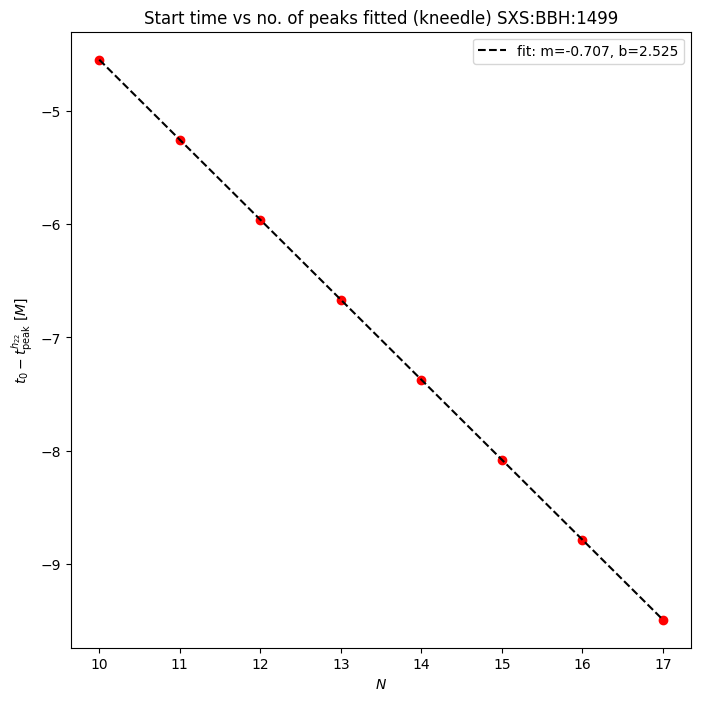

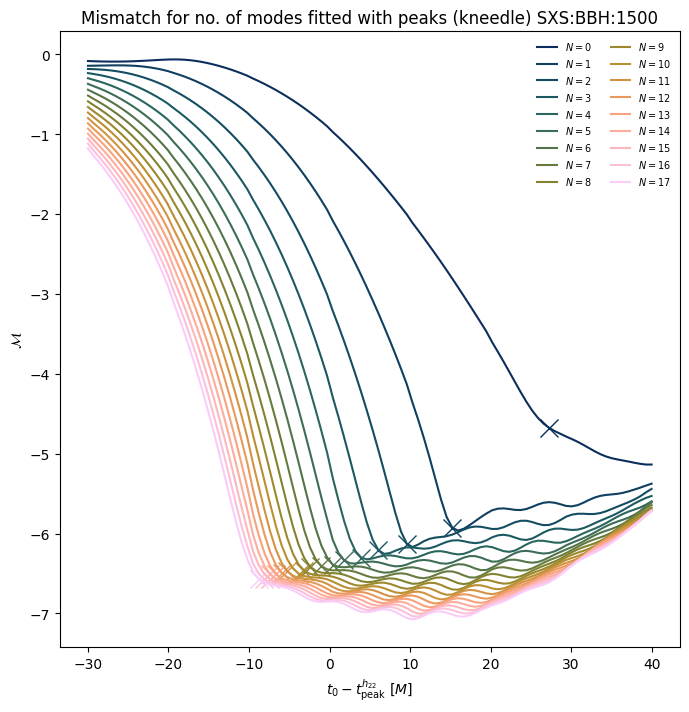

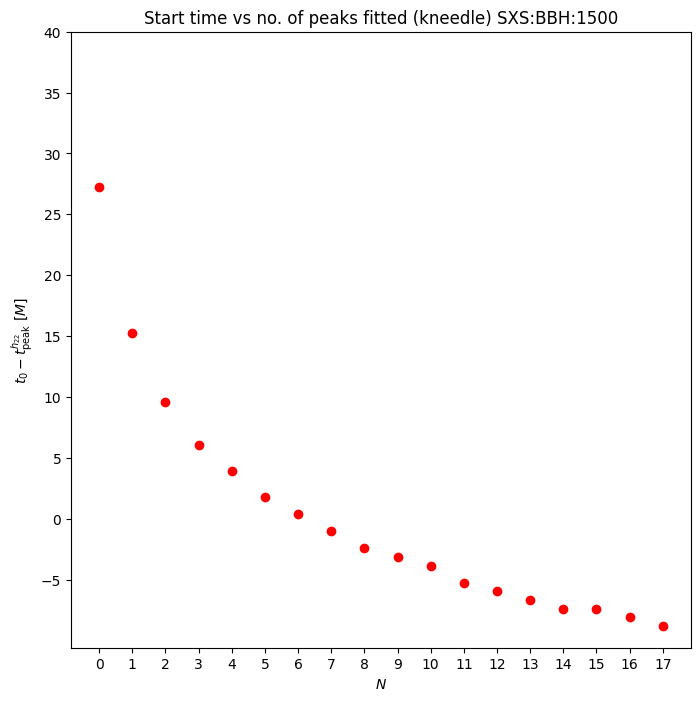

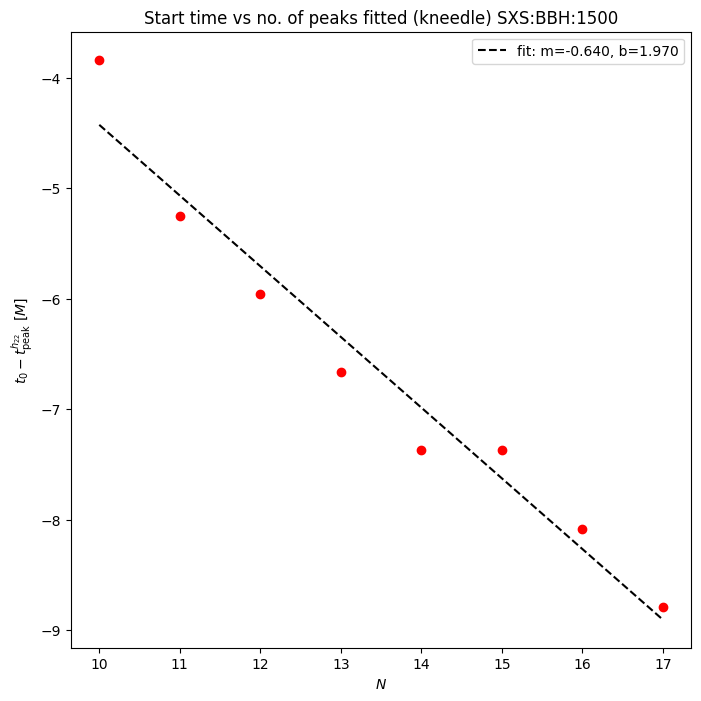

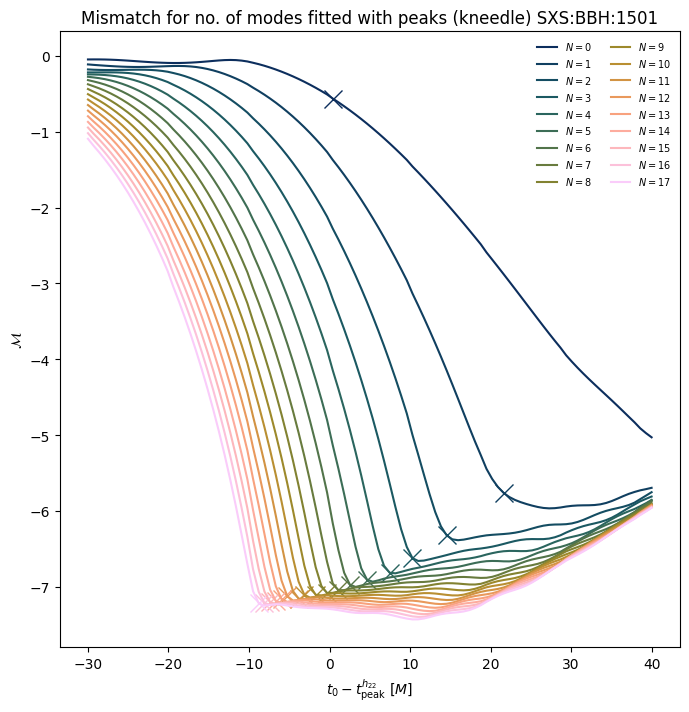

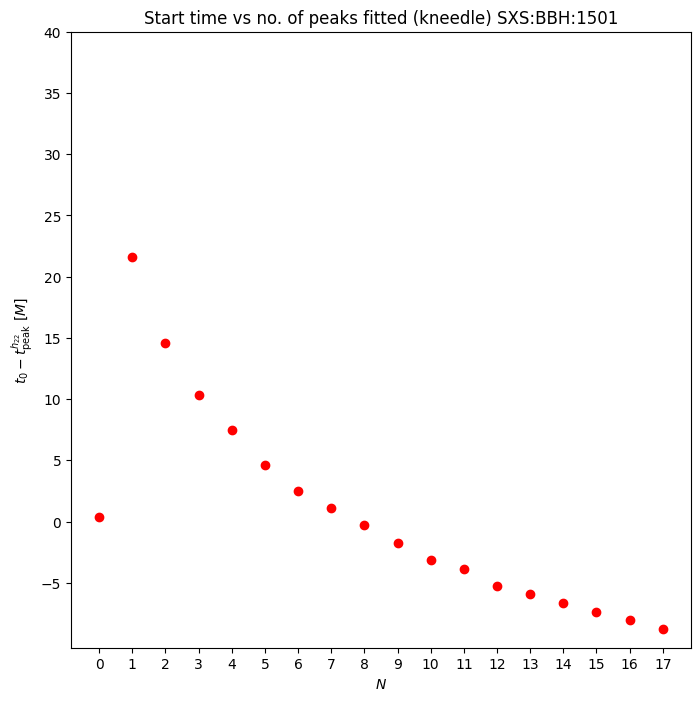

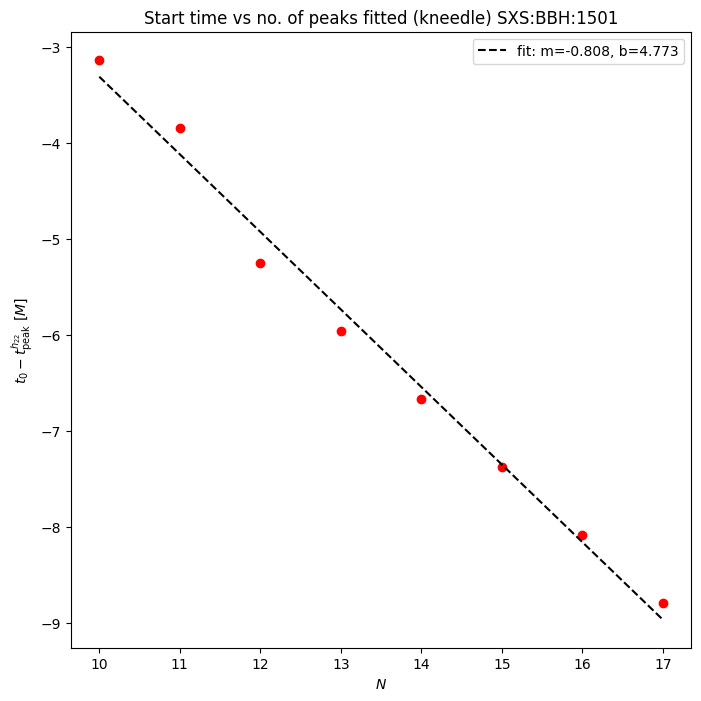

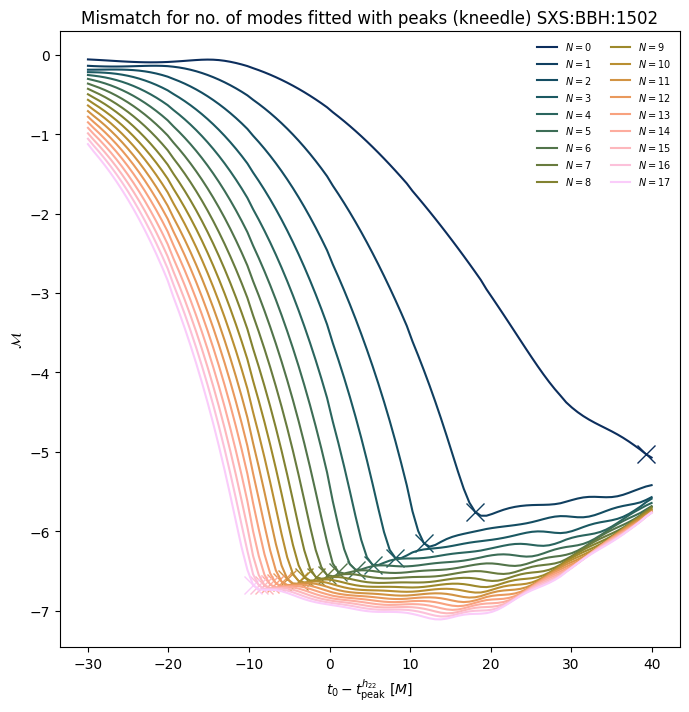

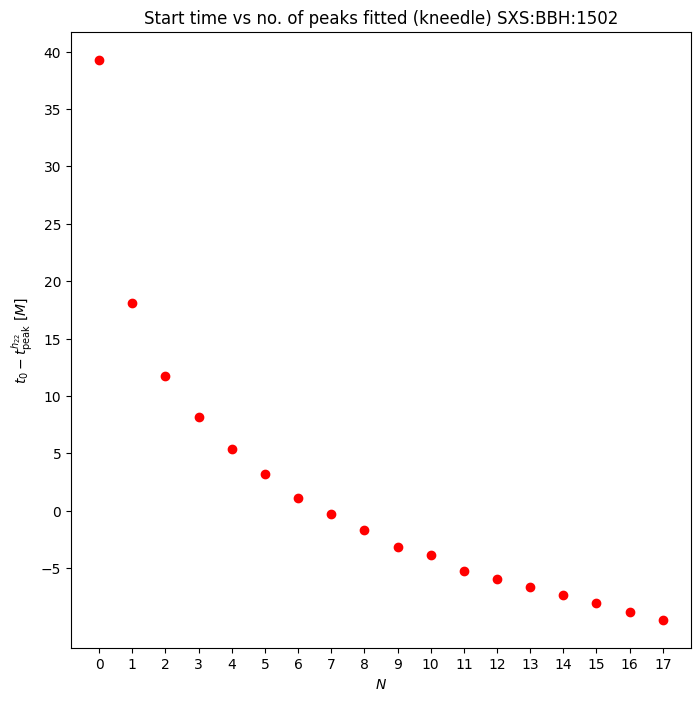

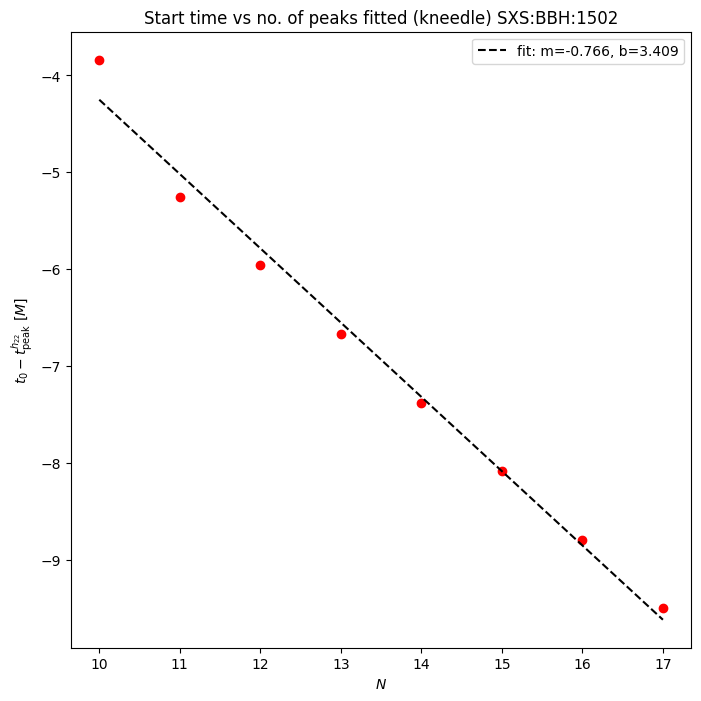

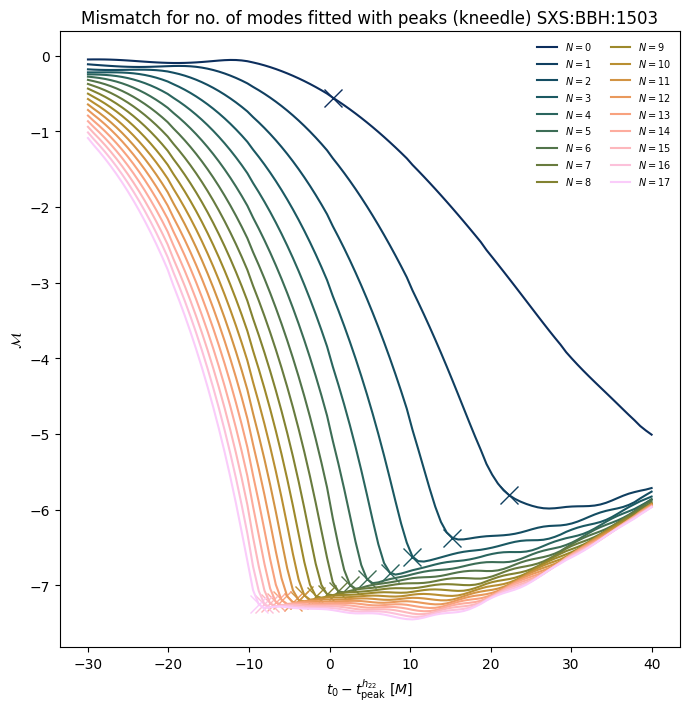

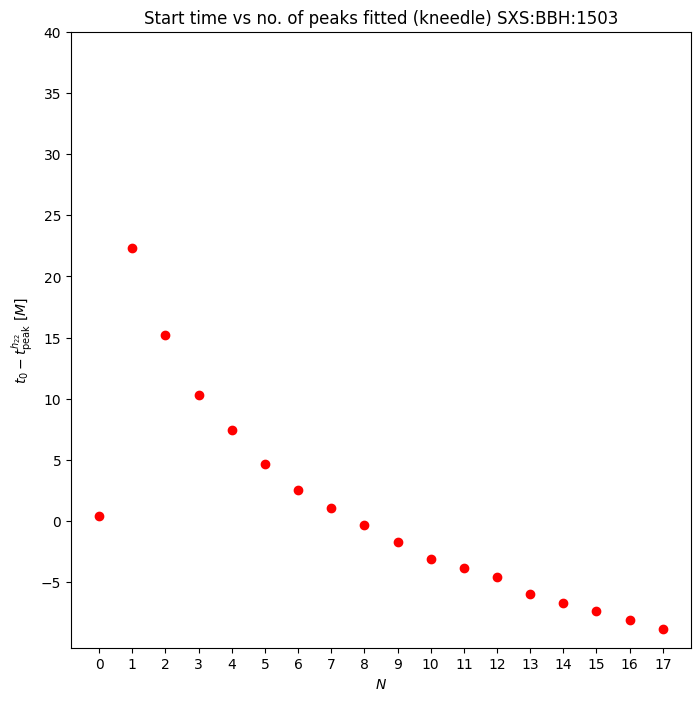

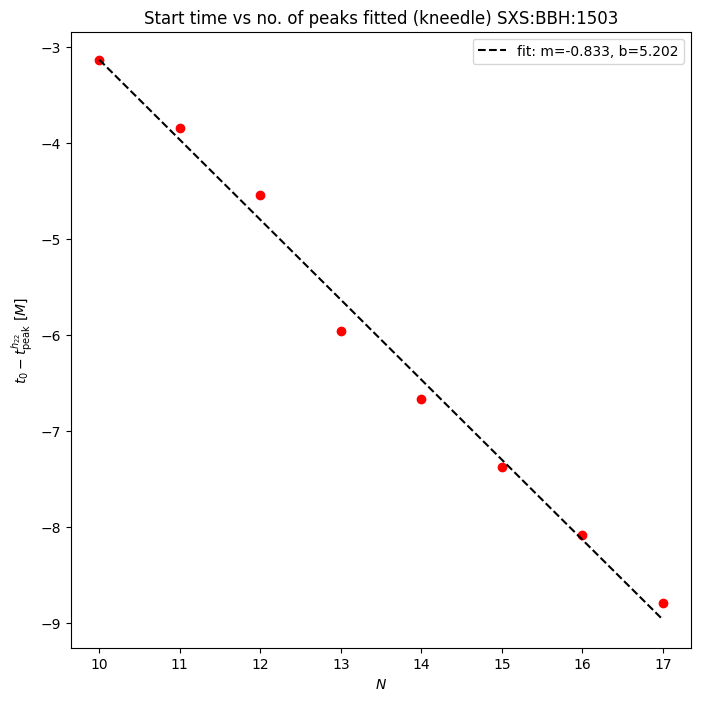

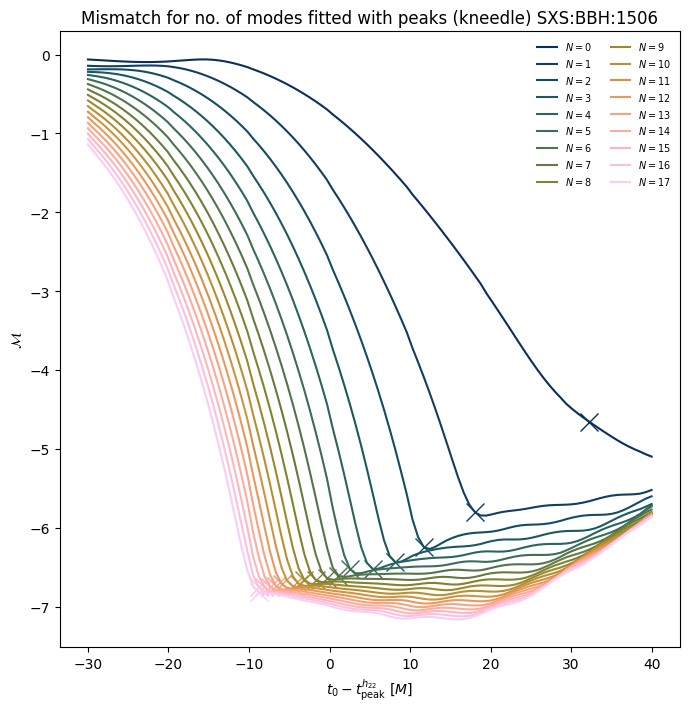

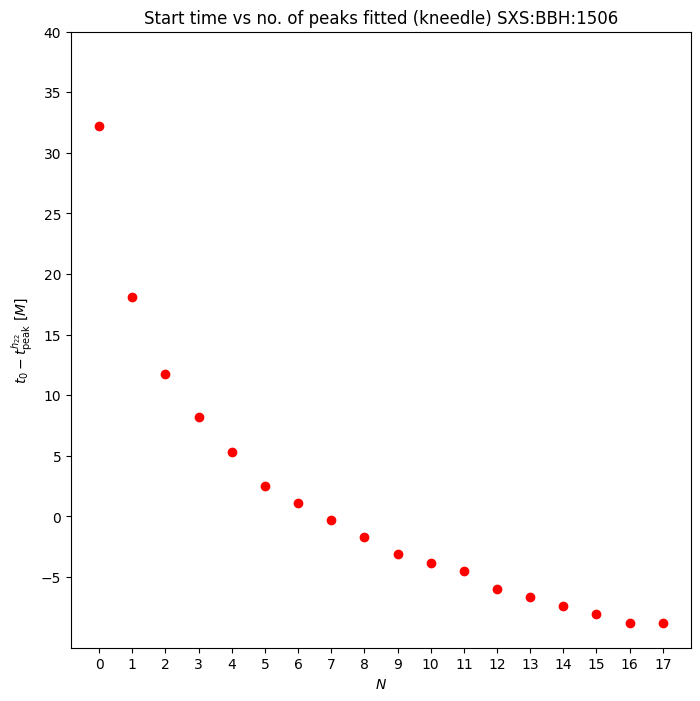

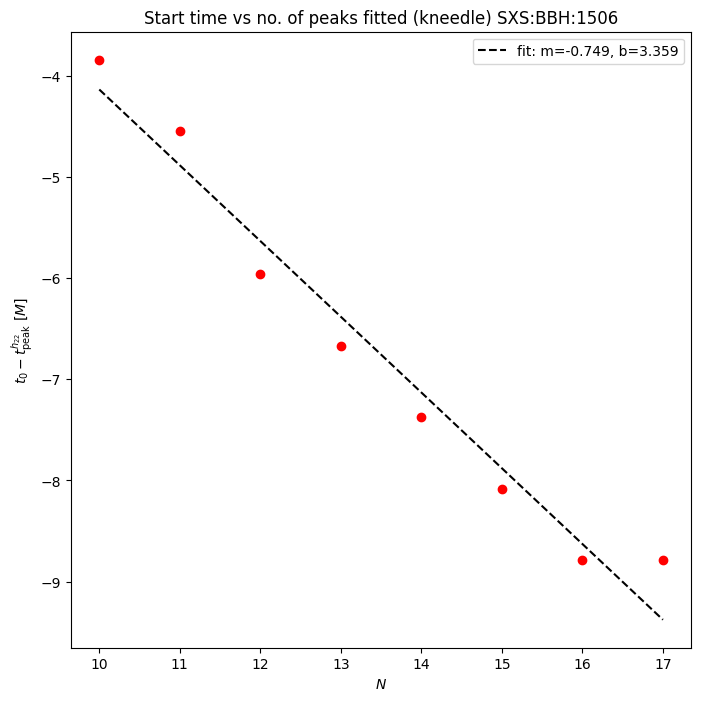

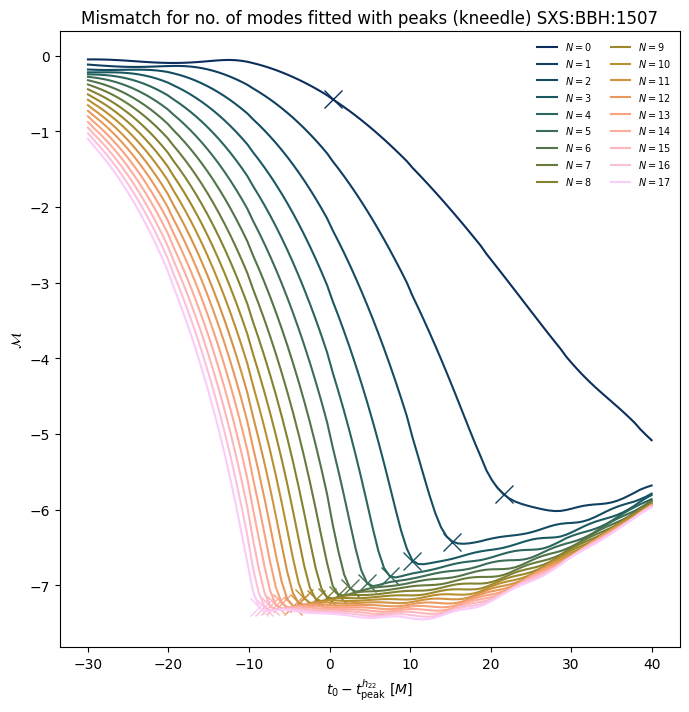

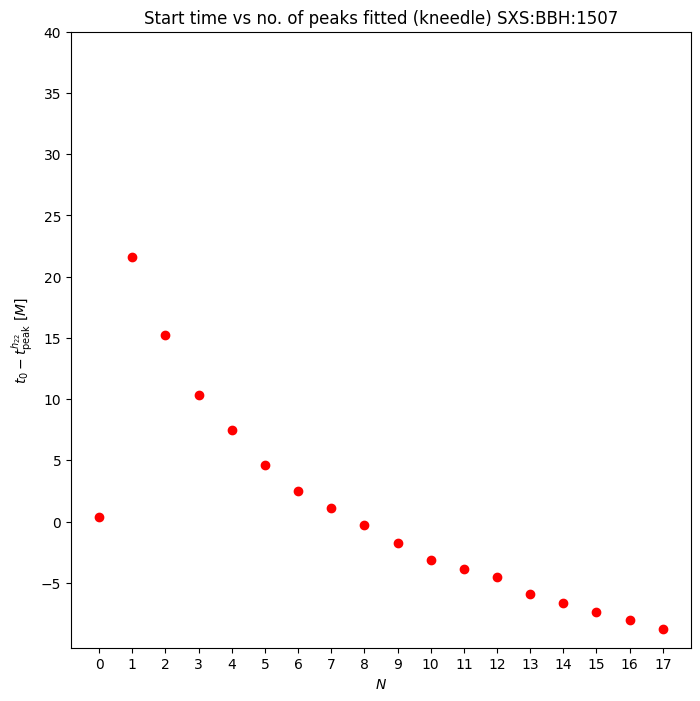

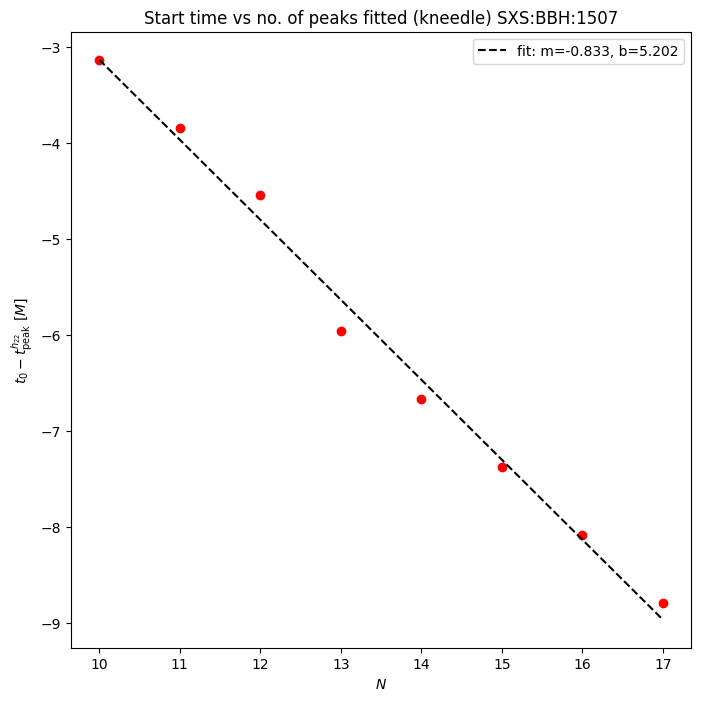

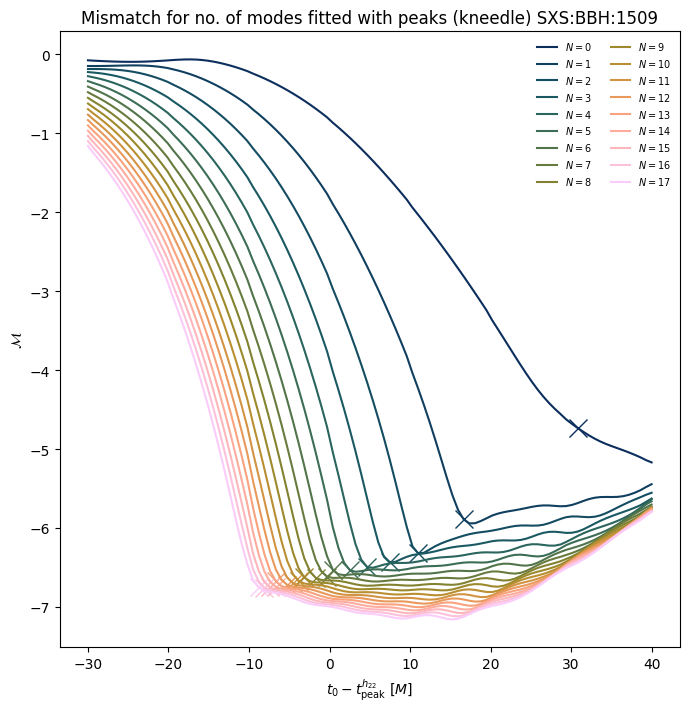

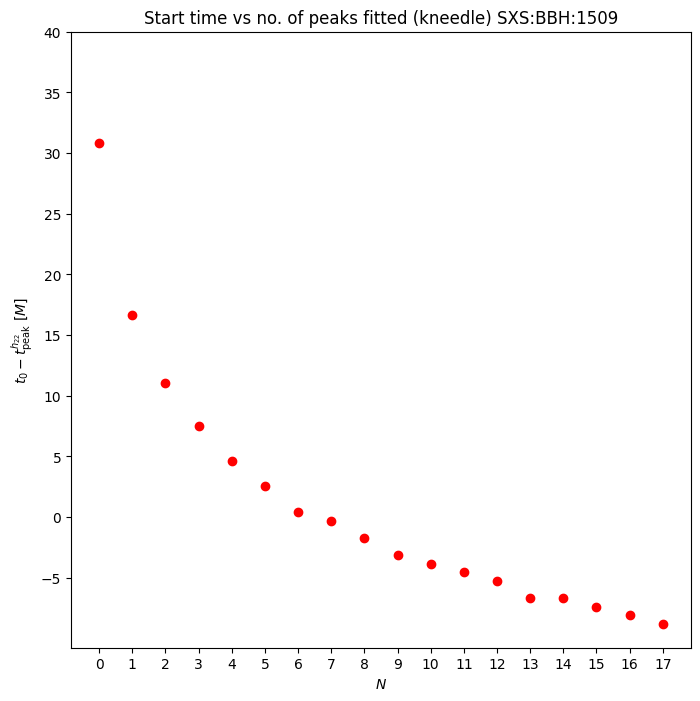

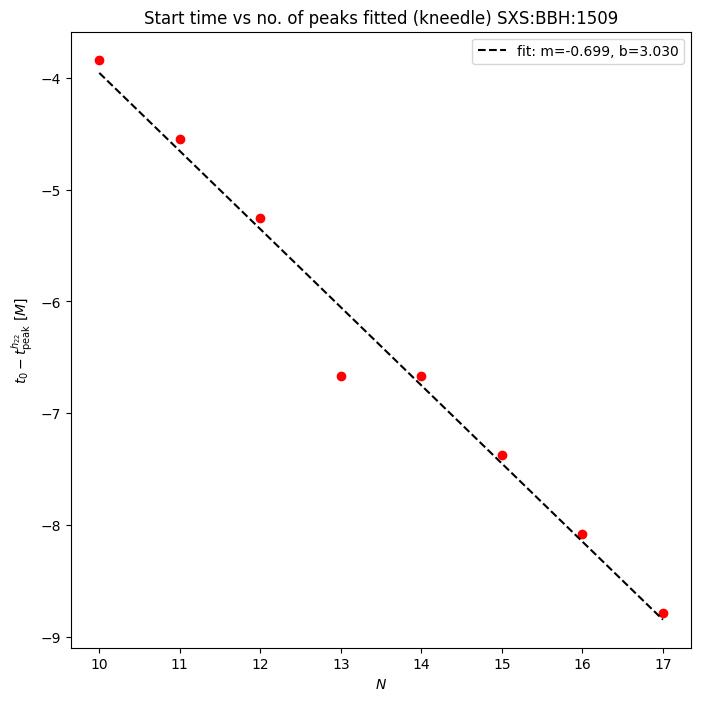

In [52]:
for (sim,ind) in zip(sims,ids):
    fig, ax = plt.subplots(figsize=(8,8))


    # The start times to use
    t0s = np.linspace(-30, 40, 100)


    N = 19
    colors = cm.batlow(np.linspace(0,1,N))

    pMs = []
    ptims = []

    for k in range(1,N):
        Ms = []
        modes = [(2,2,n,1) for n in range(k)]
        for i in range(len(t0s)):
            fit = qnmfits.ringdown_fit(
                sim.times,
                sim.h[2,2],
                modes,
                Mf=sim.Mf,
                chif=sim.chif_mag,
                t0=t0s[i]
            )
            Ms.append(fit['mismatch'])

        logMs = np.log(Ms)/np.log(10)
        
        ax.plot(t0s, logMs, alpha = 1, label=f'$N = {modes[-1][-2]}$', color = colors[k],zorder=i)
        
        kneedle = KneeLocator(t0s, -logMs, S=0.01, curve="concave", direction="increasing", online = "true")
        ax.plot(kneedle.knee, logMs[np.ndarray.tolist(t0s).index(kneedle.knee)], "x", markersize = 12.5, color = colors[k])
        #print((kneedle.knee))
        #print((kneedle.elbow))
        pMs.append(logMs[np.ndarray.tolist(t0s).index(kneedle.knee)])
        ptims.append(kneedle.knee)

    print(np.diff(t0s))


    #ax.grid(which='both')
    ax.set_title(r'Mismatch for no. of modes fitted with peaks (kneedle) SXS:BBH:' + str(ind))
    ax.set_xlabel('$t_0 - t^{h_{22}}_\mathrm{peak}\ [M]$')
    ax.set_ylabel('$\mathcal{M}$')
    ax.legend(loc='lower right')
    #ax.set_yscale('log')

    #ax.set_xlim(-11,-8)
    #ax.set_ylim(-7,-6)

    _ = ax.legend(ncol=2, frameon=False, fontsize=7)
    #plt.savefig('mismatchpeaks.png', dpi=500, bbox_inches='tight')
    # Save figure
    if not os.path.exists(mismatch_dir):
        os.makedirs(mismatch_dir)
    plt.savefig(mismatch_dir + 'mismatchpeakskneedle' + str(ind) + '.png', dpi=500, bbox_inches='tight')
    print('Saved mismatchpeakskneedle' + str(ind) + '.png')
    

################################################################################
    
    fig, ax = plt.subplots(figsize=(8,8))

    ax.scatter(np.arange(N-1),ptims,color="red")

    #ax.grid(which='both')
    ax.set_title(r'Start time vs no. of peaks fitted (kneedle) SXS:BBH:' + str(ind))
    ax.set_xlabel('$N$')
    ax.set_ylabel('$t_0 - t^{h_{22}}_\mathrm{peak}\ [M]$')
    #ax.set_yscale('log')

    ax.set_yticks(np.linspace(-5,40,10));
    ax.set_xticks(np.arange(N-1));

    #plt.savefig('starttimevspeaks.png', dpi=500, bbox_inches='tight')
    # Save figure
    if not os.path.exists(mismatch_dir):
        os.makedirs(mismatch_dir)
    plt.savefig(mismatch_dir + 'mismatchstarttimescipy' + str(ind) + '.png', dpi=500, bbox_inches='tight')
    print('Saved mismatchstarttimescipy' + str(ind) + '.png')

    
################################################################################

    fig, ax = plt.subplots(figsize=(8,8))

    lastN = np.arange(N-1)[-8:]
    lastt = np.array(ptims[-8:])

    ax.scatter(lastN, lastt, color="red")


    # Defining the function we want to fit.
    def modelfunc(x, m, b):
        return m*x + b

    # Extracting parameters from the fit.
    popt, pcov = curve_fit(modelfunc, lastN, lastt)

    ax.plot(lastN, modelfunc(lastN, *popt), 'black', linestyle='--', label='fit: m=%5.3f, b=%5.3f' % tuple(popt), zorder=10)


    #ax.grid(which='both')
    ax.set_title(r'Start time vs no. of peaks fitted (kneedle) SXS:BBH:' + str(ind))
    ax.set_xlabel('$N$')
    ax.set_ylabel('$t_0 - t^{h_{22}}_\mathrm{peak}\ [M]$')
    #ax.set_yscale('log')
    ax.legend(loc='upper right')

    #ax.set_yticks(np.aarange)
    ax.set_xticks(np.arange(N-1)[-8:]);

    #plt.savefig('starttimevspeaks.png', dpi=500, bbox_inches='tight')
    # Save figure
    if not os.path.exists(mismatch_dir):
        os.makedirs(mismatch_dir)
    plt.savefig(mismatch_dir + 'mismatchpeakskneedlelast' + str(ind) + '.png', dpi=500, bbox_inches='tight')
    print('Saved mismatchpeakskneedlelast' + str(ind) + '.png')


Saved mismatchstarttimescipy305.png
Saved mismatchstarttimescipy1476.png
Saved mismatchstarttimescipy1477.png
Saved mismatchstarttimescipy1481.png
Saved mismatchstarttimescipy1492.png
Saved mismatchstarttimescipy1495.png
Saved mismatchstarttimescipy1497.png
Saved mismatchstarttimescipy1499.png
Saved mismatchstarttimescipy1500.png
Saved mismatchstarttimescipy1501.png
Saved mismatchstarttimescipy1502.png
Saved mismatchstarttimescipy1503.png
Saved mismatchstarttimescipy1506.png
Saved mismatchstarttimescipy1507.png
Saved mismatchstarttimescipy1509.png


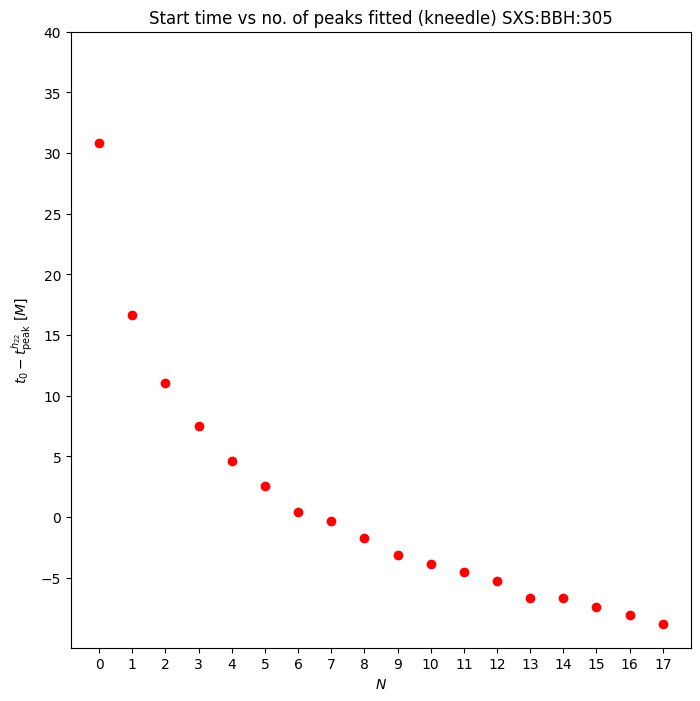

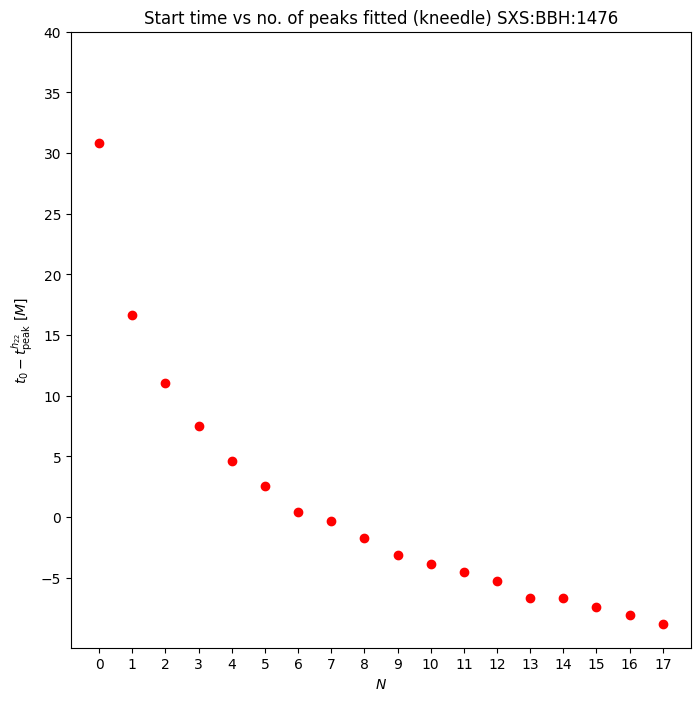

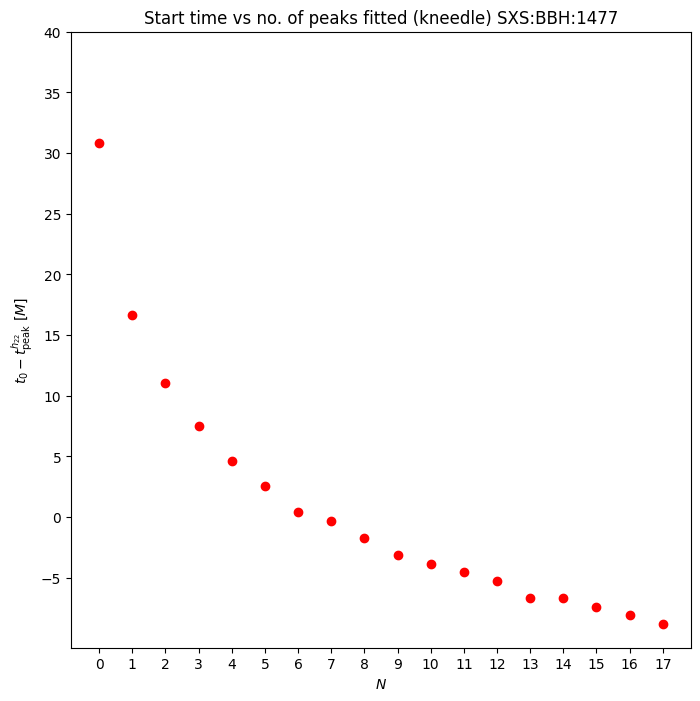

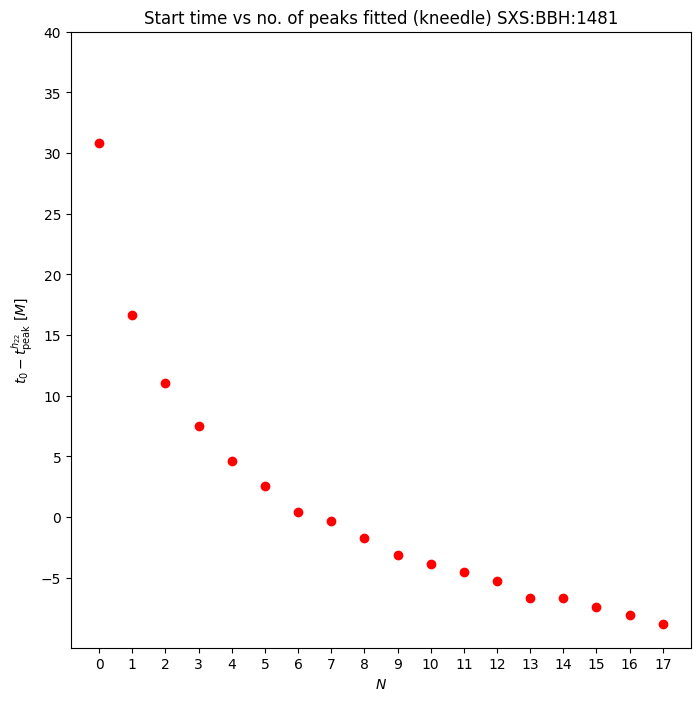

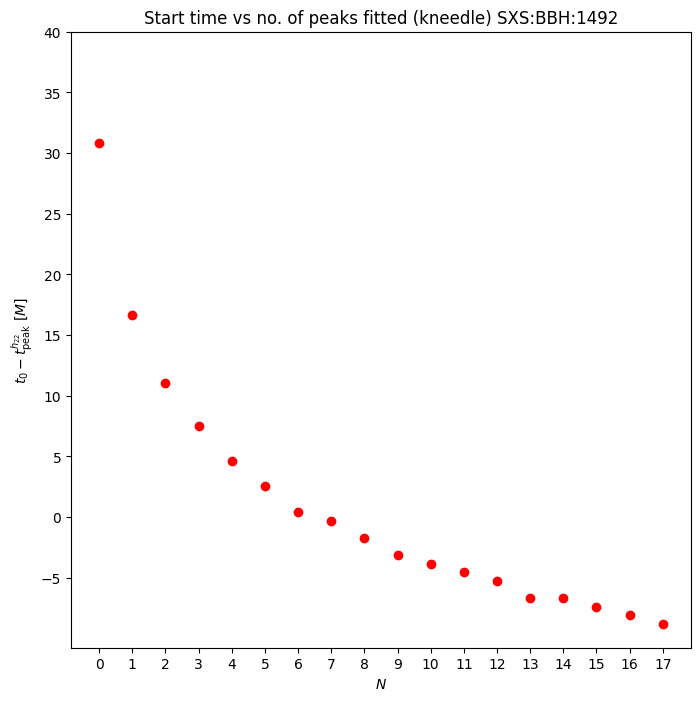

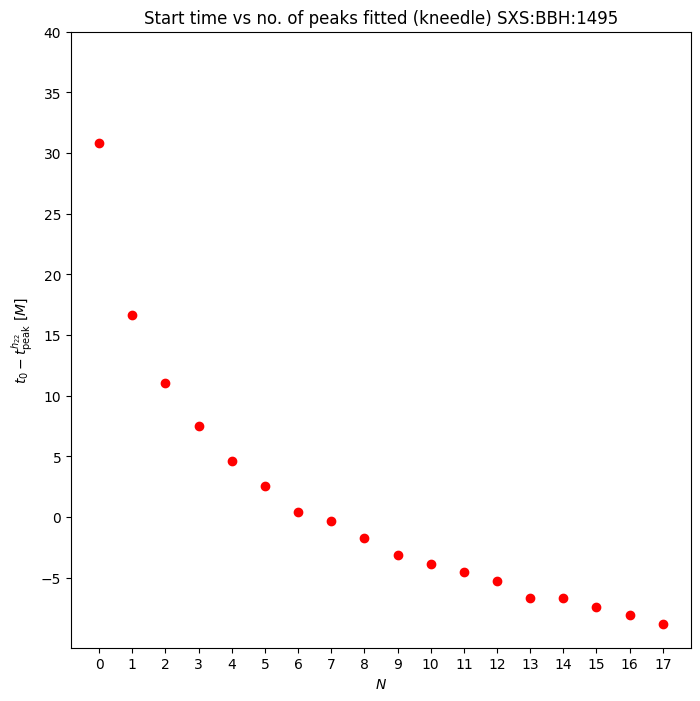

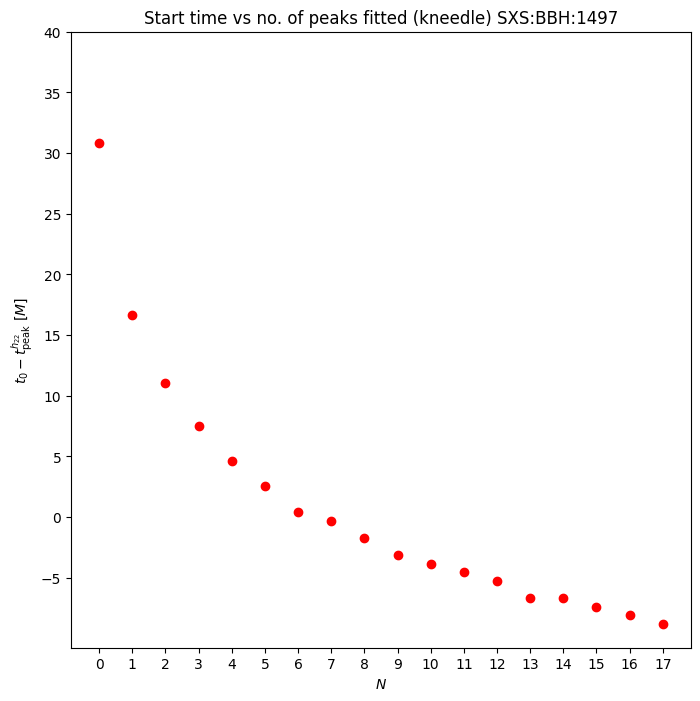

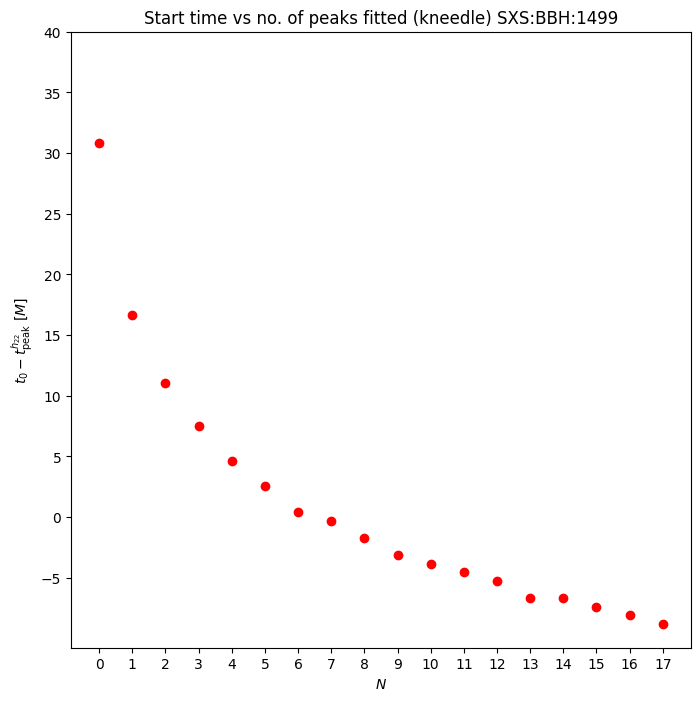

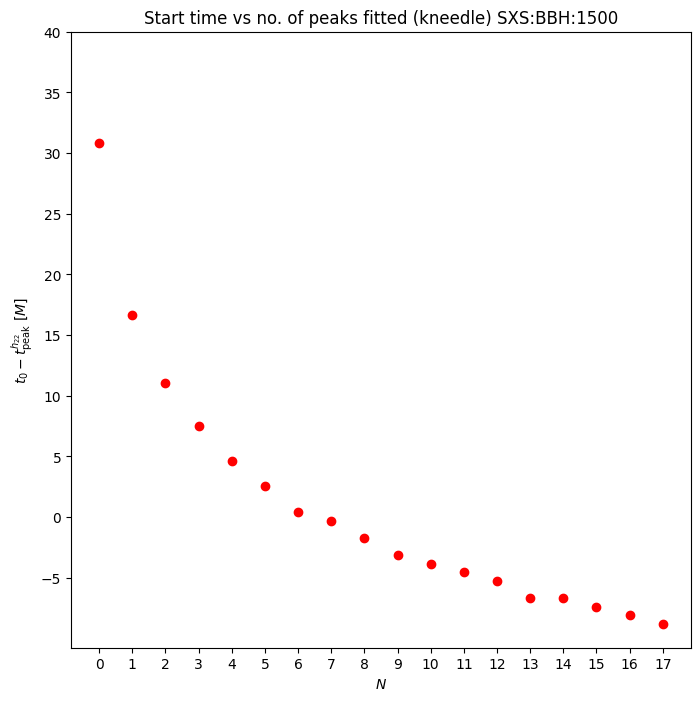

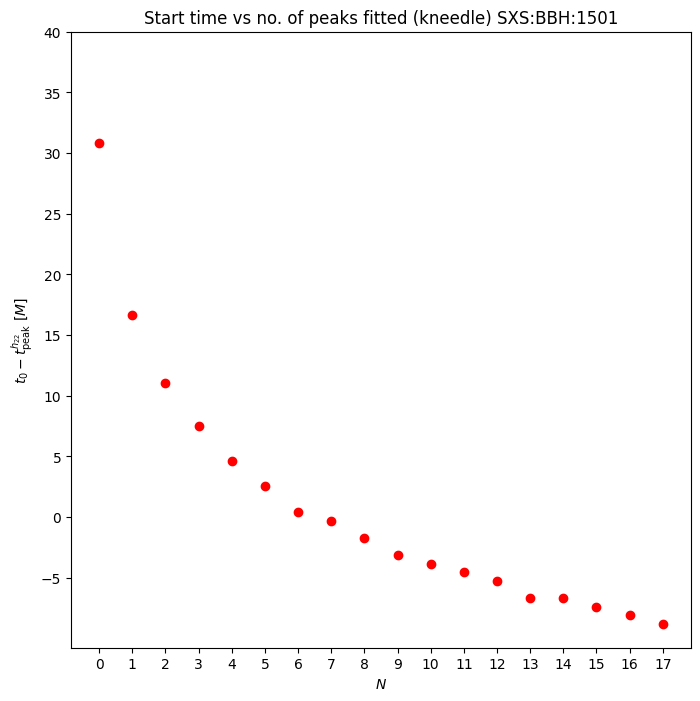

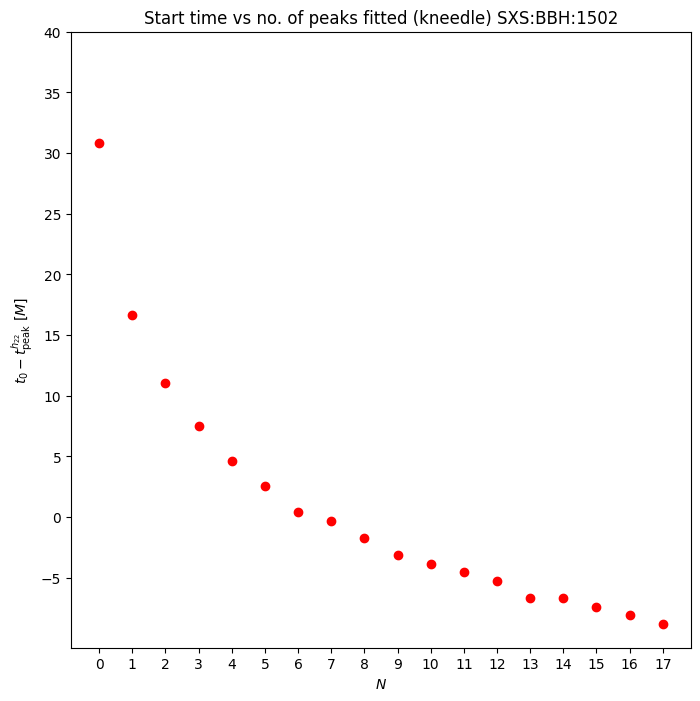

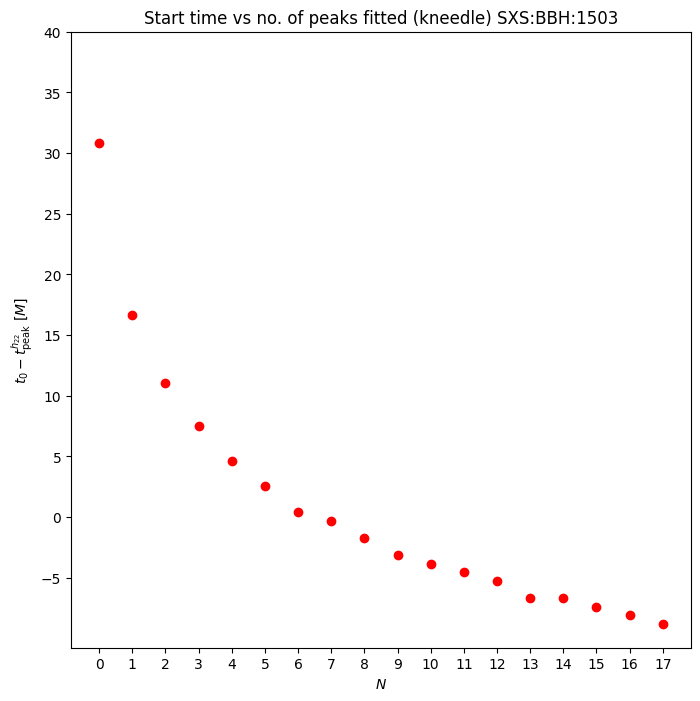

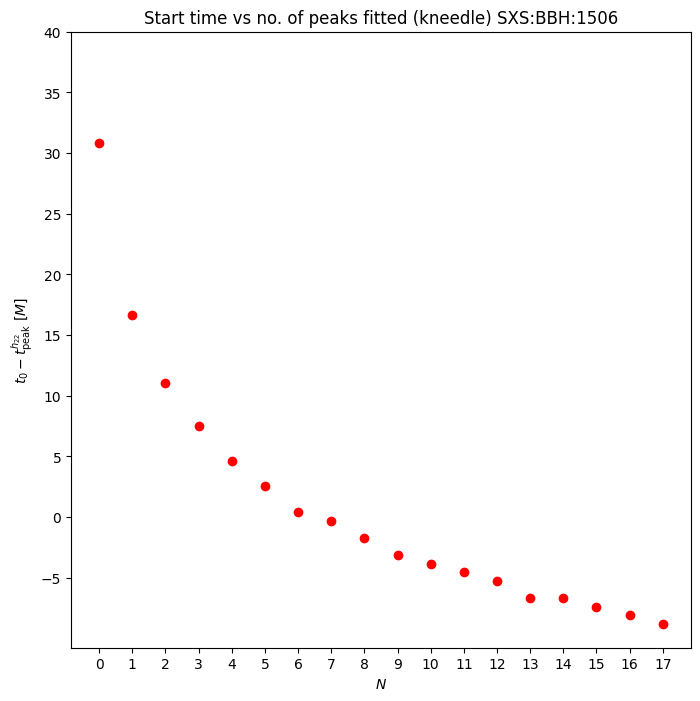

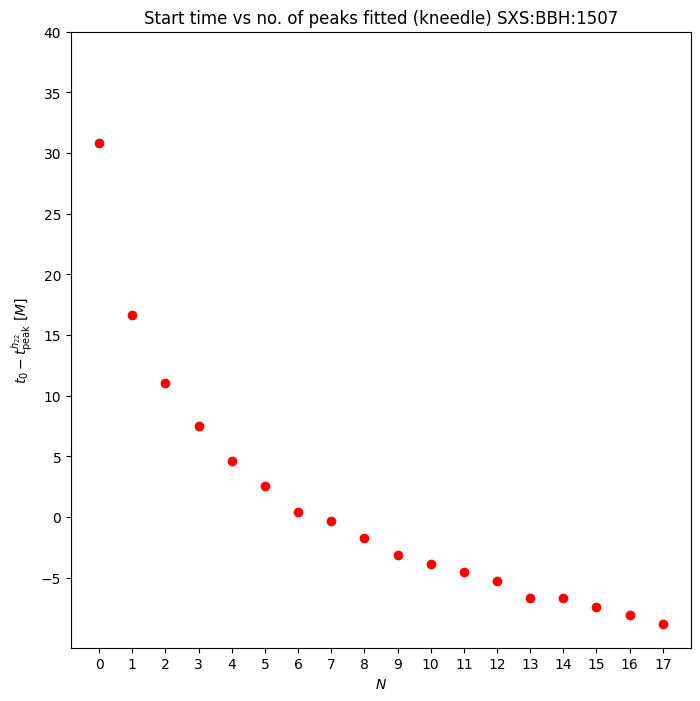

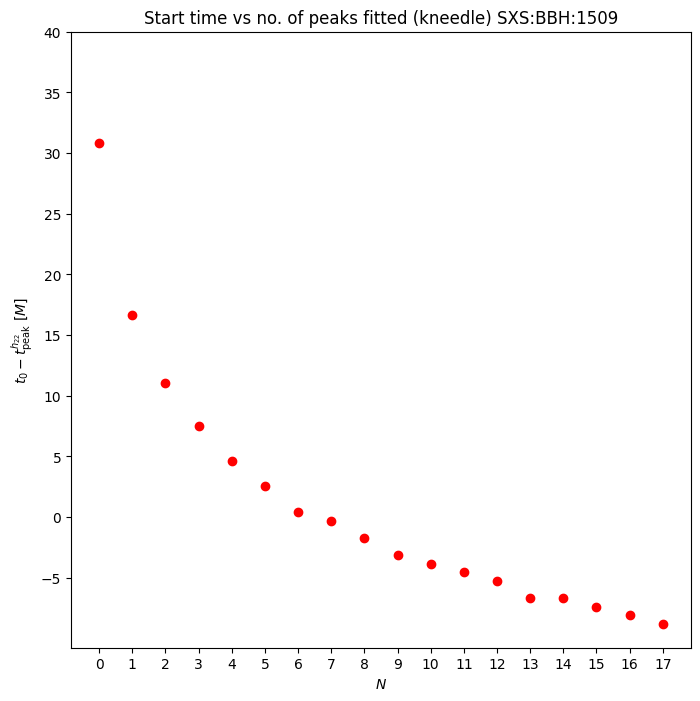

In [46]:
for (sim,ind) in zip(sims,ids):
    fig, ax = plt.subplots(figsize=(8,8))

    ax.scatter(np.arange(N-1),ptims,color="red")

    #ax.grid(which='both')
    ax.set_title(r'Start time vs no. of peaks fitted (kneedle) SXS:BBH:' + str(ind))
    ax.set_xlabel('$N$')
    ax.set_ylabel('$t_0 - t^{h_{22}}_\mathrm{peak}\ [M]$')
    #ax.set_yscale('log')

    ax.set_yticks(np.linspace(-5,40,10));
    ax.set_xticks(np.arange(N-1));

    #plt.savefig('starttimevspeaks.png', dpi=500, bbox_inches='tight')
    # Save figure
    if not os.path.exists(mismatch_dir):
        os.makedirs(mismatch_dir)
    plt.savefig(mismatch_dir + 'mismatchstarttimescipy' + str(ind) + '.png', dpi=500, bbox_inches='tight')
    print('Saved mismatchstarttimescipy' + str(ind) + '.png')

Saved mismatchpeakskneedlelast305.png
Saved mismatchpeakskneedlelast1476.png
Saved mismatchpeakskneedlelast1477.png
Saved mismatchpeakskneedlelast1481.png
Saved mismatchpeakskneedlelast1492.png
Saved mismatchpeakskneedlelast1495.png
Saved mismatchpeakskneedlelast1497.png
Saved mismatchpeakskneedlelast1499.png
Saved mismatchpeakskneedlelast1500.png
Saved mismatchpeakskneedlelast1501.png
Saved mismatchpeakskneedlelast1502.png
Saved mismatchpeakskneedlelast1503.png
Saved mismatchpeakskneedlelast1506.png
Saved mismatchpeakskneedlelast1507.png
Saved mismatchpeakskneedlelast1509.png


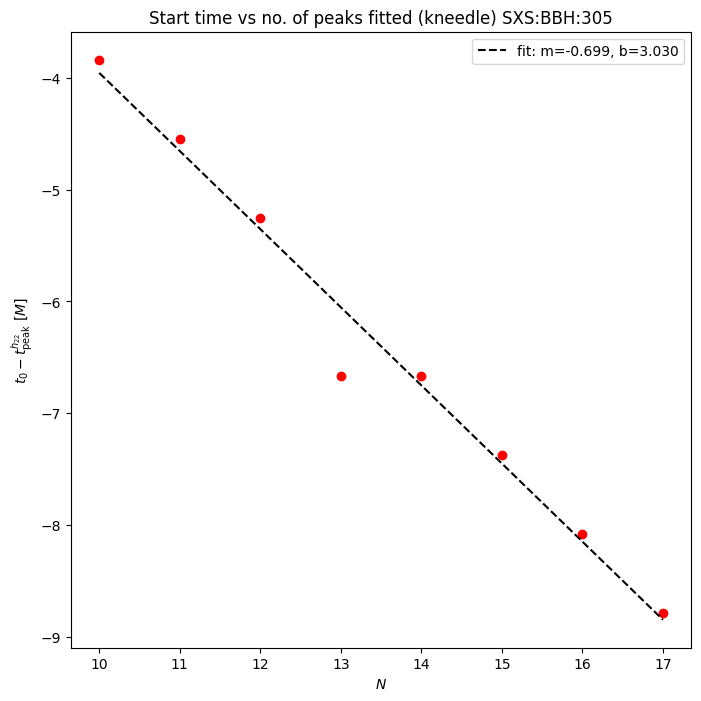

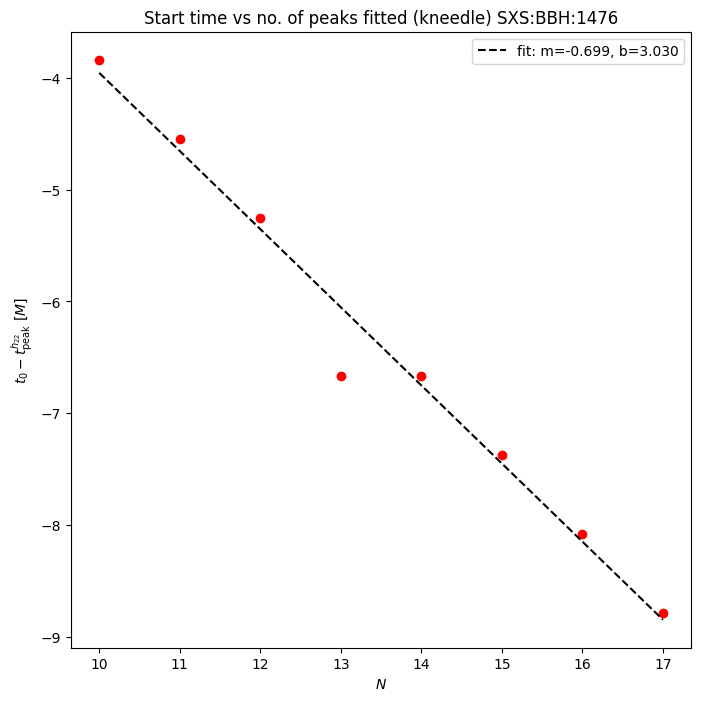

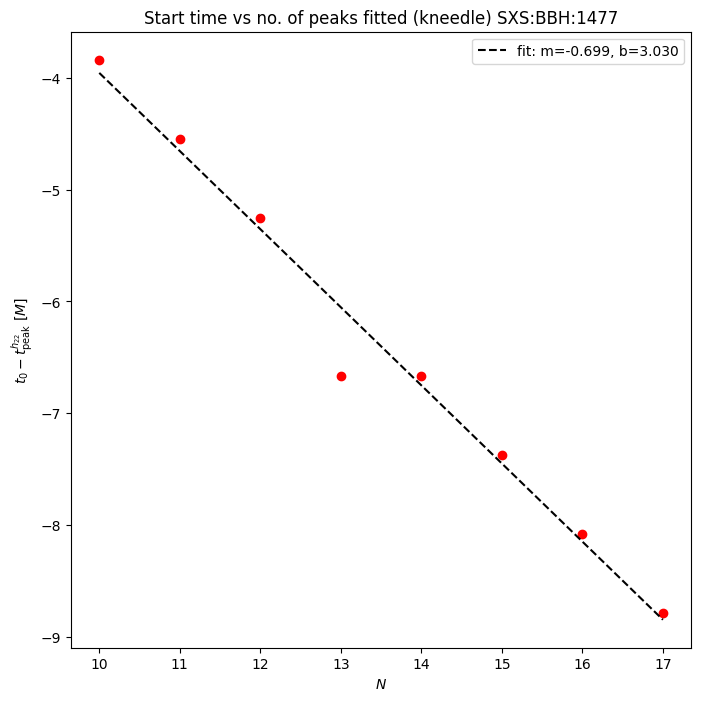

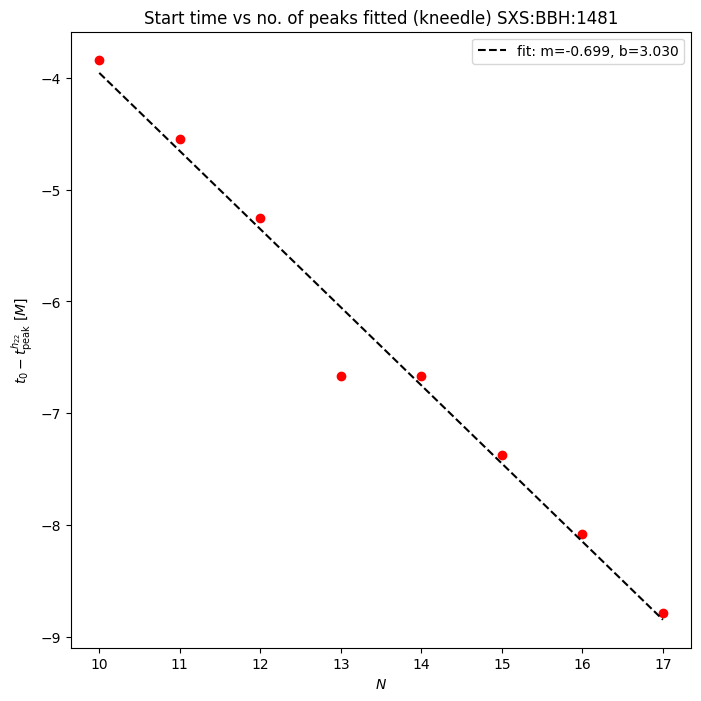

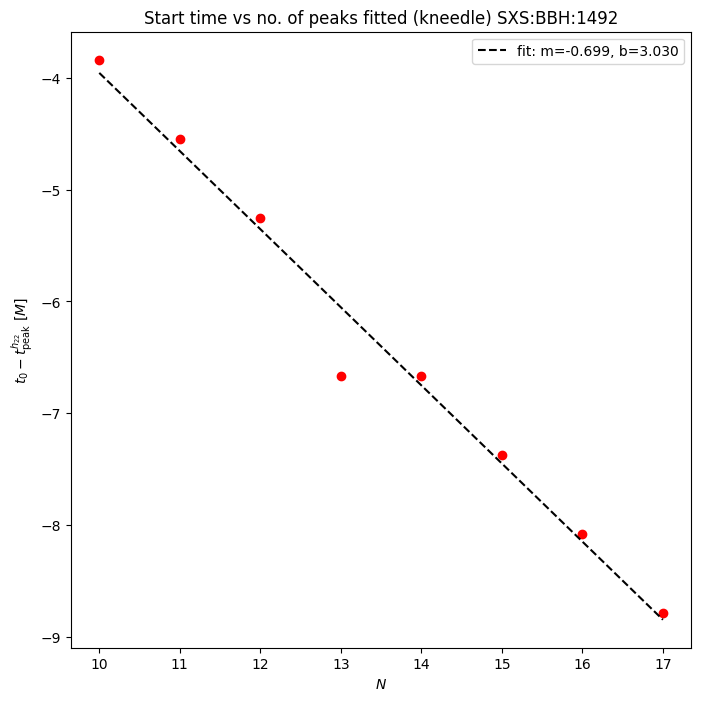

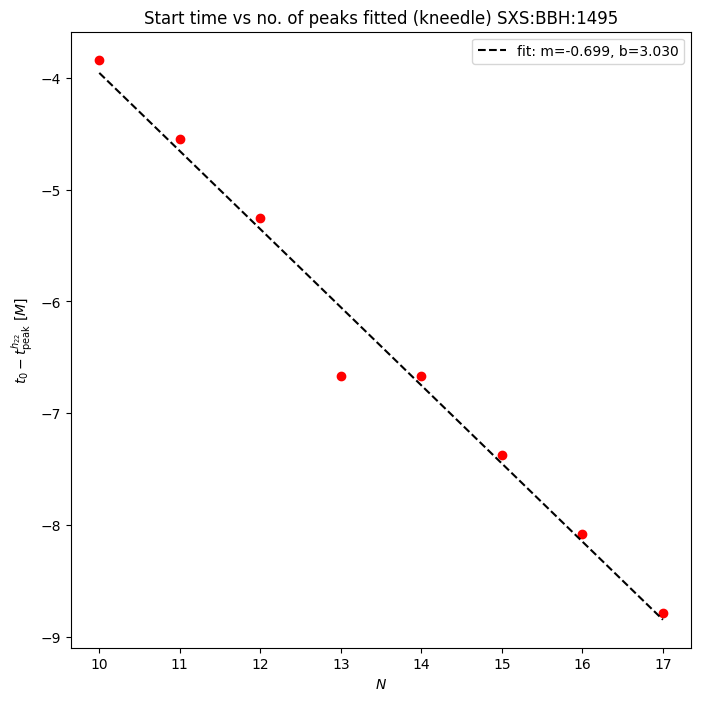

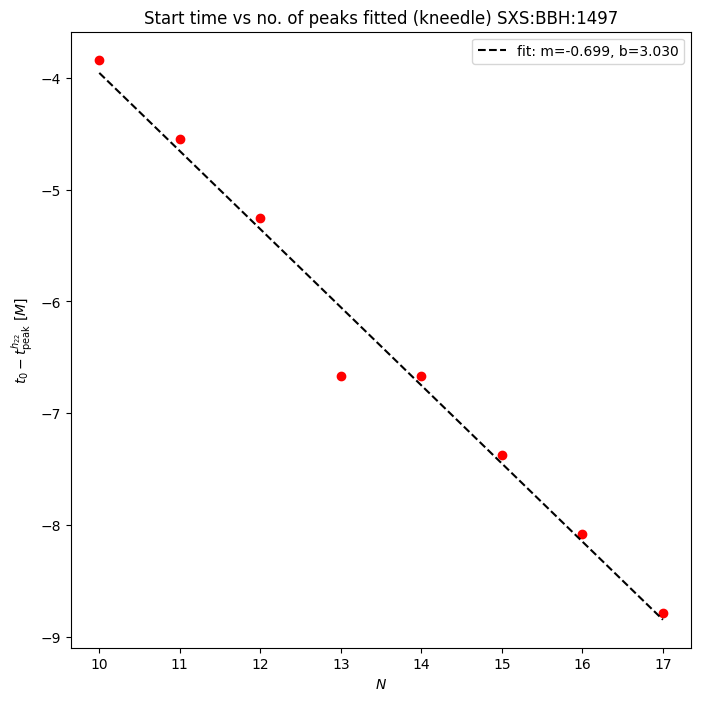

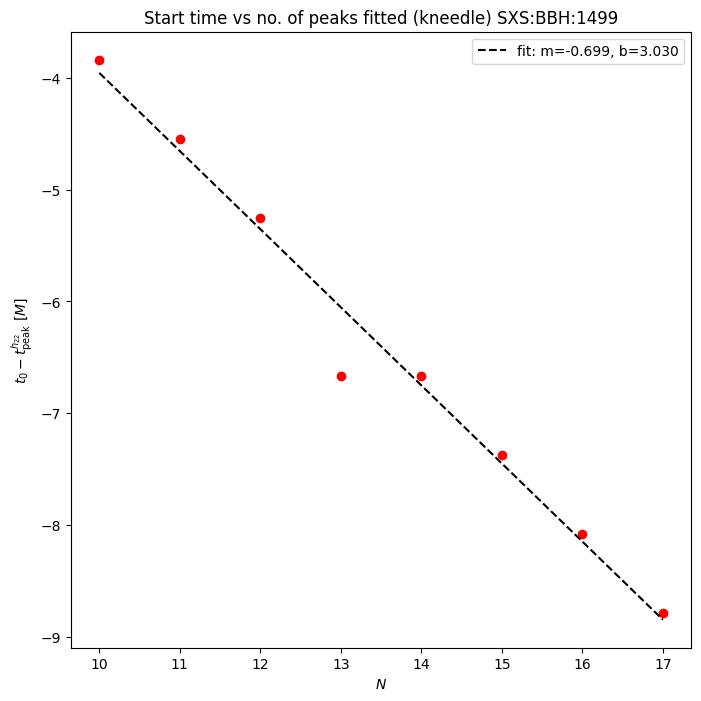

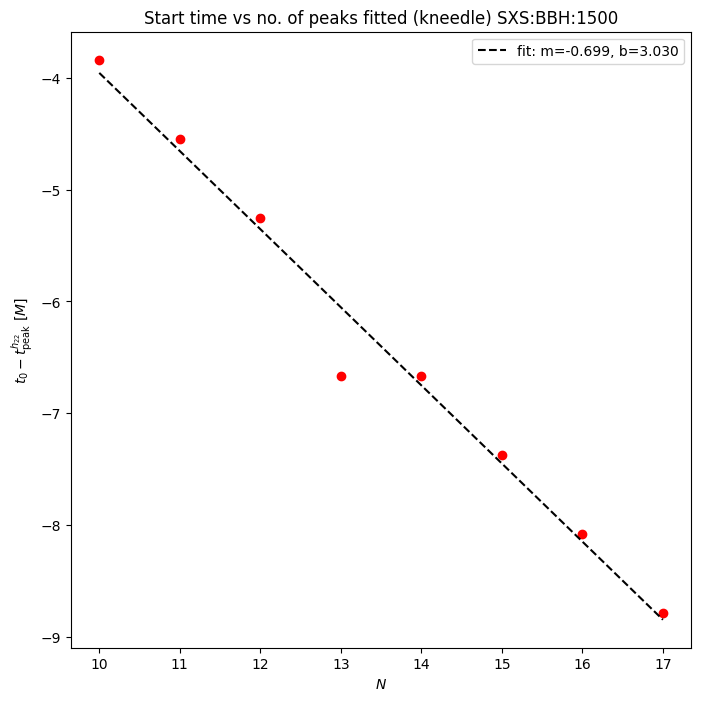

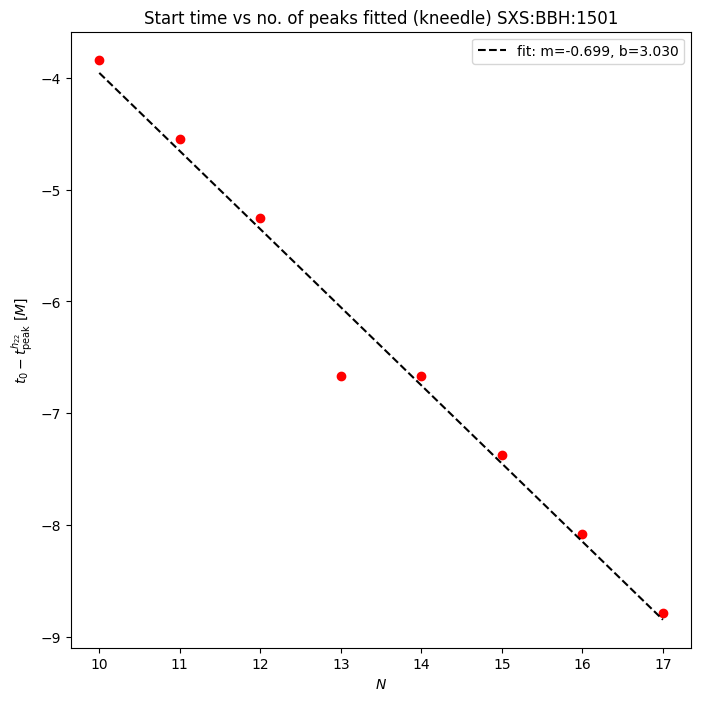

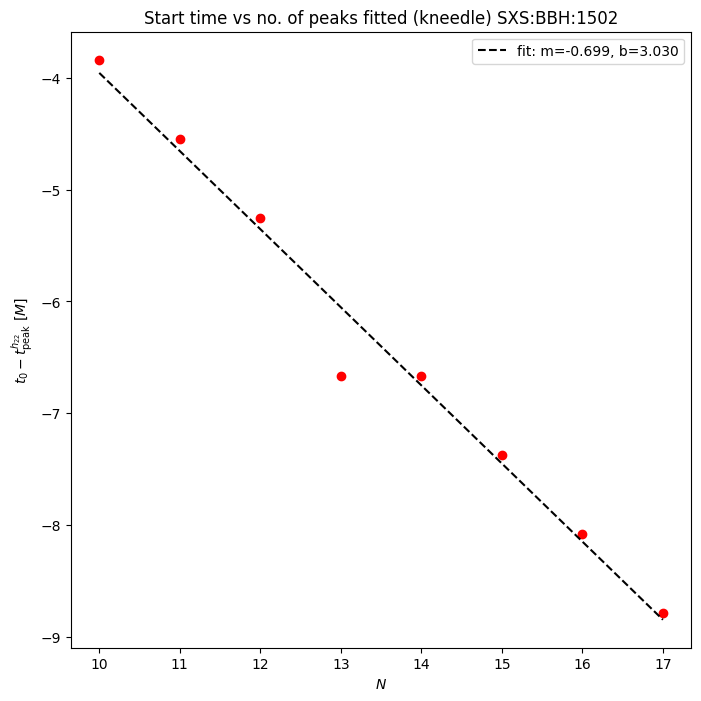

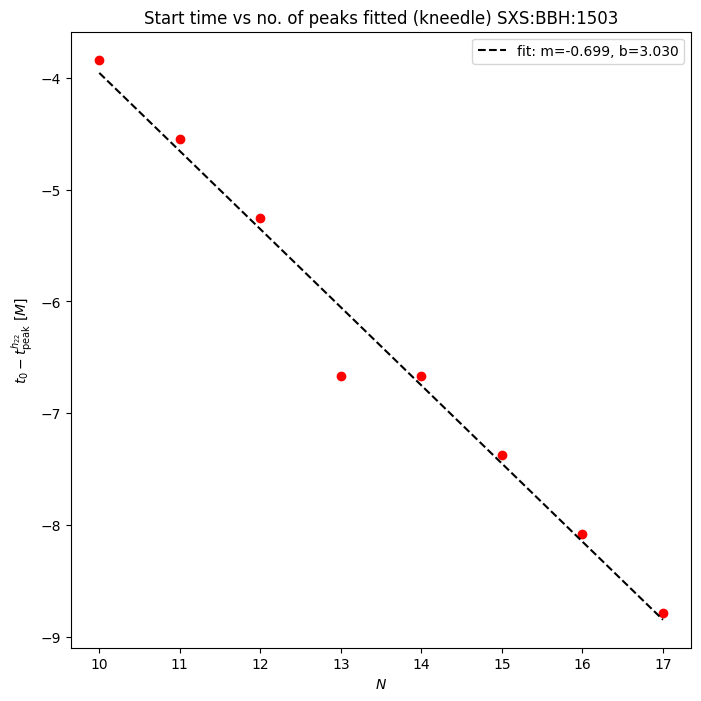

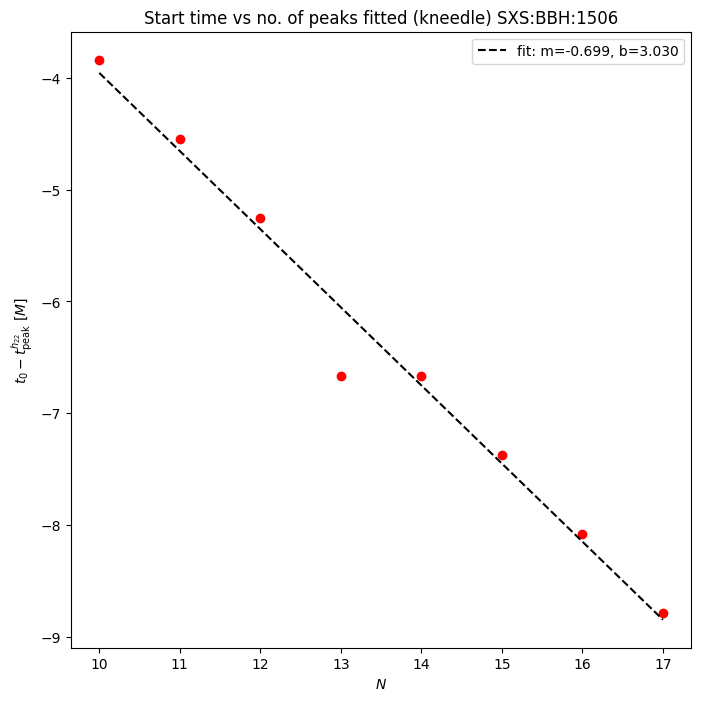

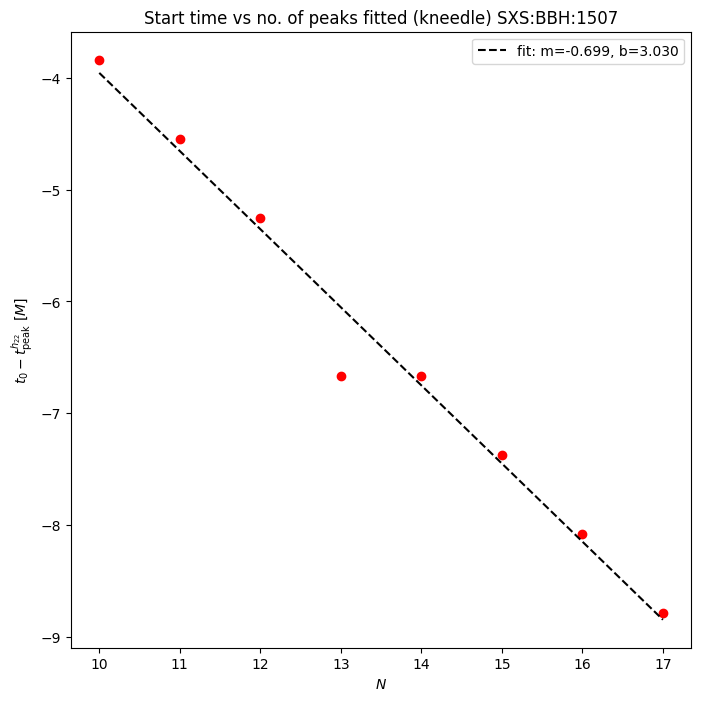

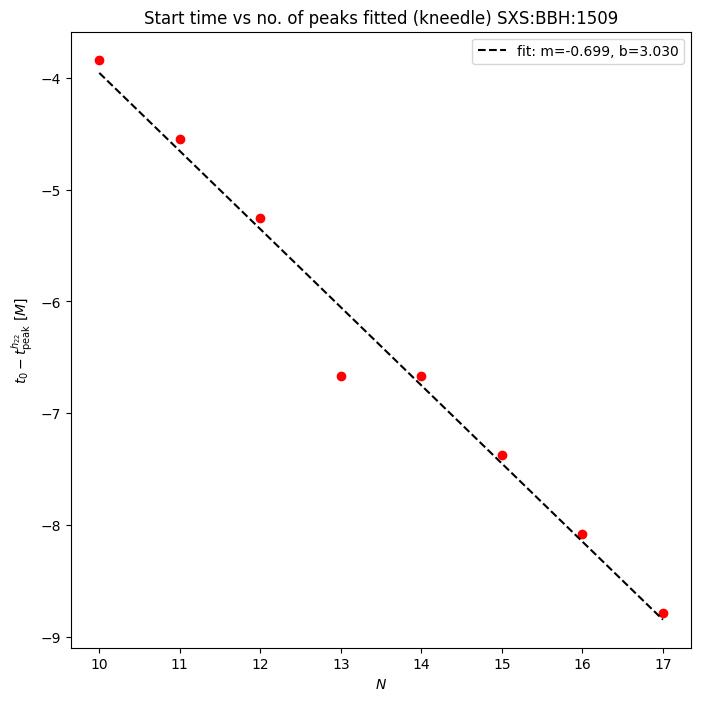

In [47]:
for (sim,ind) in zip(sims,ids):
    fig, ax = plt.subplots(figsize=(8,8))

    lastN = np.arange(N-1)[-8:]
    lastt = np.array(ptims[-8:])

    ax.scatter(lastN, lastt, color="red")


    # Defining the function we want to fit.
    def modelfunc(x, m, b):
        return m*x + b

    # Extracting parameters from the fit.
    popt, pcov = curve_fit(modelfunc, lastN, lastt)

    ax.plot(lastN, modelfunc(lastN, *popt), 'black', linestyle='--', label='fit: m=%5.3f, b=%5.3f' % tuple(popt), zorder=10)


    #ax.grid(which='both')
    ax.set_title(r'Start time vs no. of peaks fitted (kneedle) SXS:BBH:' + str(ind))
    ax.set_xlabel('$N$')
    ax.set_ylabel('$t_0 - t^{h_{22}}_\mathrm{peak}\ [M]$')
    #ax.set_yscale('log')
    ax.legend(loc='upper right')

    #ax.set_yticks(np.aarange)
    ax.set_xticks(np.arange(N-1)[-8:]);

    #plt.savefig('starttimevspeaks.png', dpi=500, bbox_inches='tight')
    # Save figure
    if not os.path.exists(mismatch_dir):
        os.makedirs(mismatch_dir)
    plt.savefig(mismatch_dir + 'mismatchpeakskneedlelast' + str(ind) + '.png', dpi=500, bbox_inches='tight')
    print('Saved mismatchpeakskneedlelast' + str(ind) + '.png')

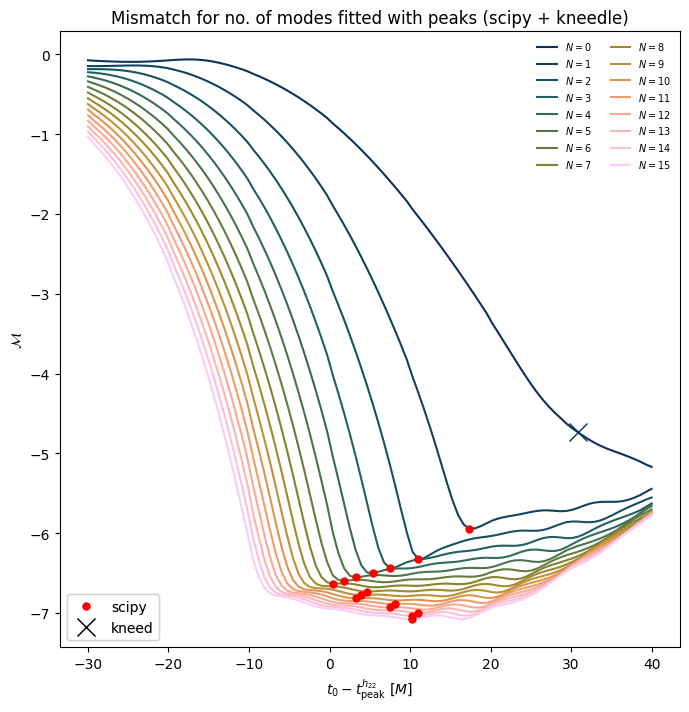

In [48]:
from kneed import KneeLocator
from scipy.signal import find_peaks
from matplotlib.lines import Line2D

fig, ax = plt.subplots(figsize=(8,8))


# The start times to use
t0s = np.linspace(-30, 40, 100)


N = 17
colors = cm.batlow(np.linspace(0,1,N))

pMs = []
ptims = []

for k in range(1,N):
    Ms = []
    modes = [(2,2,n,1) for n in range(k)]
    for i in range(len(t0s)):
        fit = qnmfits.ringdown_fit(
            sim.times,
            sim.h[2,2],
            modes,
            Mf=sim.Mf,
            chif=sim.chif_mag,
            t0=t0s[i]
        )
        Ms.append(fit['mismatch'])

    logMs = np.log(Ms)/np.log(10)
    
    ax.plot(t0s, logMs, alpha = 1, label=f'$N = {modes[-1][-2]}$', color = colors[k],zorder=i)
    
    peak, _ = find_peaks(-logMs, height=3, prominence=0.0000000000000000001)
    #print(peak)

    p = [t0s[peak],logMs[peak]]

    if len(peak) >= 1:
        ax.plot(t0s[peak[0]], logMs[peak[0]], "o", markersize = 5, color = "red", zorder=100)
        ptims.append(t0s[peak[0]])
        pMs.append(logMs[peak[0]])
    else:
        kneedle = KneeLocator(t0s, -logMs, S=0.01, curve="concave", direction="increasing", online = "true")
        ax.plot(kneedle.knee, logMs[np.ndarray.tolist(t0s).index(kneedle.knee)], "x", markersize = 12.5, color = colors[k], zorder=100)
        pMs.append(logMs[np.ndarray.tolist(t0s).index(kneedle.knee)])
        ptims.append(kneedle.knee)



#ax.grid(which='both')
ax.set_title(r'Mismatch for no. of modes fitted with peaks (scipy + kneedle)')
ax.set_xlabel('$t_0 - t^{h_{22}}_\mathrm{peak}\ [M]$')
ax.set_ylabel('$\mathcal{M}$')
#ax.set_yscale('log')

legend1 = ax.legend(ncol=2, frameon=False, fontsize=7, loc='upper right')

# Add the first legend to the axis
ax.add_artist(legend1)

legend_elements = [Line2D([0], [0], marker='o', color='red', label='scipy',
                          markerfacecolor='red', markersize=5, linestyle='None'),
                   Line2D([0], [0], marker='x', color='black', label='kneed',
                          markerfacecolor='black', markersize=12.5, linestyle='None')]

# Create the first legend
legend2 = ax.legend(handles=legend_elements, loc='lower left')

# Add the first legend to the axis
ax.add_artist(legend2)


#plt.savefig('mismatchpeaks.png', dpi=500, bbox_inches='tight')

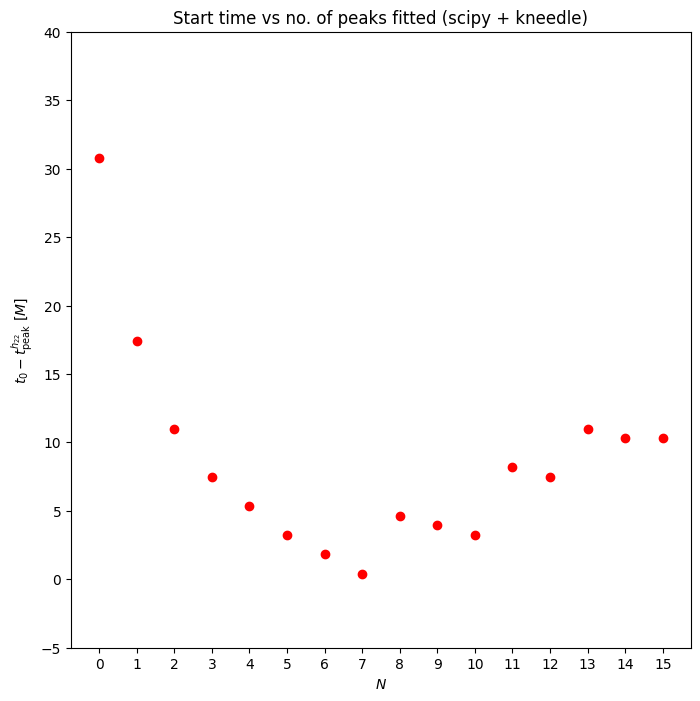

In [49]:
fig, ax = plt.subplots(figsize=(8,8))

ax.scatter(np.arange(N-1),np.array(ptims),color="red")

#ax.grid(which='both')
ax.set_title(r'Start time vs no. of peaks fitted (scipy + kneedle)')
ax.set_xlabel('$N$')
ax.set_ylabel('$t_0 - t^{h_{22}}_\mathrm{peak}\ [M]$')
#ax.set_yscale('log')

ax.set_yticks(np.linspace(-5,40,10))
ax.set_xticks(np.arange(N-1))

#plt.savefig('starttimevspeaks.png', dpi=500, bbox_inches='tight')

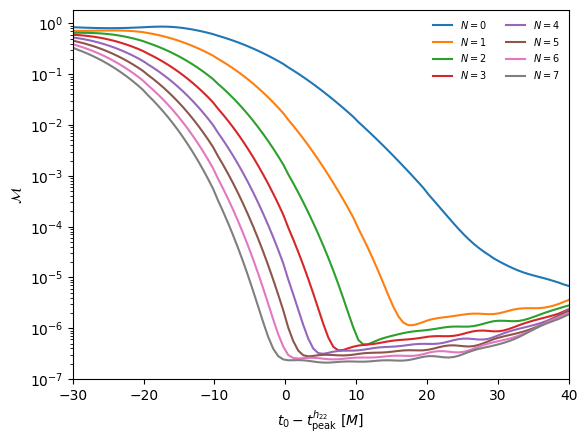

In [50]:
# We will fit to the (2,2) spherical-harmonic mode, with the following
# combinations of modes:
mode_list = [[(2,2,n,1) for n in range(N)] for N in range(1,7+2)]

# The start times to use
t0_array = np.linspace(-30, 40, 100)

# Create figure
fig, ax = plt.subplots(dpi=100)

for modes in mode_list:
    
    # Create mismatch list
    mm_list = qnmfits.mismatch_t0_array(
        sim.times,
        sim.h[2,2],
        modes,
        Mf=sim.Mf,
        chif=sim.chif_mag,
        t0_array=t0_array
    )
    
    # Add to figure
    ax.semilogy(t0_array, mm_list, label=f'$N = {modes[-1][-2]}$')
    
# Plot limits and labels
ax.set_xlim(t0_array[0], t0_array[-1])
ax.set_xlabel('$t_0 - t^{h_{22}}_\mathrm{peak}\ [M]$')
ax.set_ylabel('$\mathcal{M}$')

_ = ax.legend(ncol=2, frameon=False, fontsize=7)